# Support Vector Machines

In [13]:
# Importing the libraries to be used:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline 

In [14]:
# Training Data
df = pd.read_csv("TSLA-Data.csv", header=0, na_values='?')
df = df.dropna()
# Get data and features are (Days since public, Open Pirce, Highest Price, Lowest Price), Volume is being discarded for SVM
X = np.array(df[['Open', 'High', 'Low']])
# Add days since public column
days = np.arange(X.shape[0]).reshape(X.shape[0], 1)
y = np.array(df['Close'])
X = np.hstack((days, X))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [15]:
# Validation Data (Validation Set using 2019 data)
df2 = pd.read_csv("TSLA-2019.csv", header=0, na_values='?')
df2 = df2.dropna()

# Get data and features are (Days since public, Open Pirce, Highest Price, Lowest Price, Volume)
X2 = np.array(df2[['Open', 'High', 'Low']])
# Add days since public column
days = np.arange(X.shape[0] + 1, X.shape[0] + X2.shape[0] + 1).reshape(X2.shape[0], 1)
x_2019 = np.hstack((days, X2))
y_2019 = np.array(df2['Close'])

In [16]:
# Split training set data. 75/25
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#print(x_train.shape)
#print(y_train.shape)

In [17]:
#Function that I use to plot comparison graphs
def plot_graph(x_input, y, y_hat, cVal, plt_title, color):
    plt.figure(figsize=(15,7))
    plt.scatter(x_input, y, c = 'b')
    plt.scatter(x_input, y_hat, c = color)
    plt.title(plt_title)
    plt.xlabel("Days Public")
    plt.ylabel("Tesla Stock Price (TSLA)")
    plt.legend(['Actual Price', 'Predicted Price'], loc = "upper left")
    plt.show()
    

In [18]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10] #Regularization Parameters

# Linear Kernel

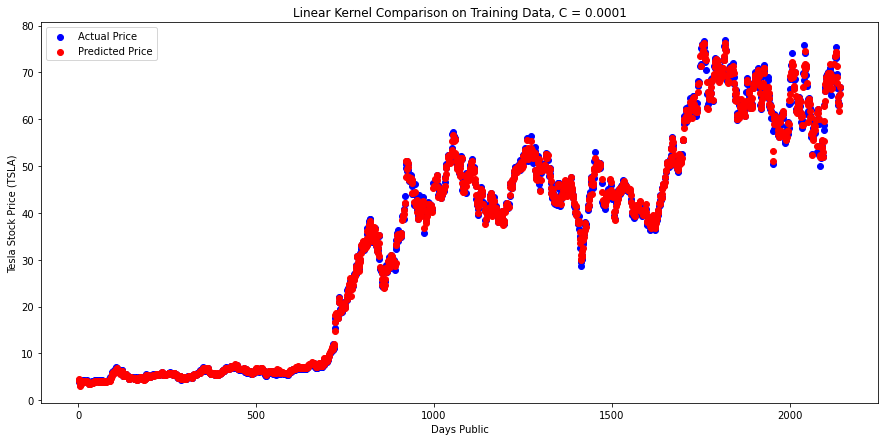

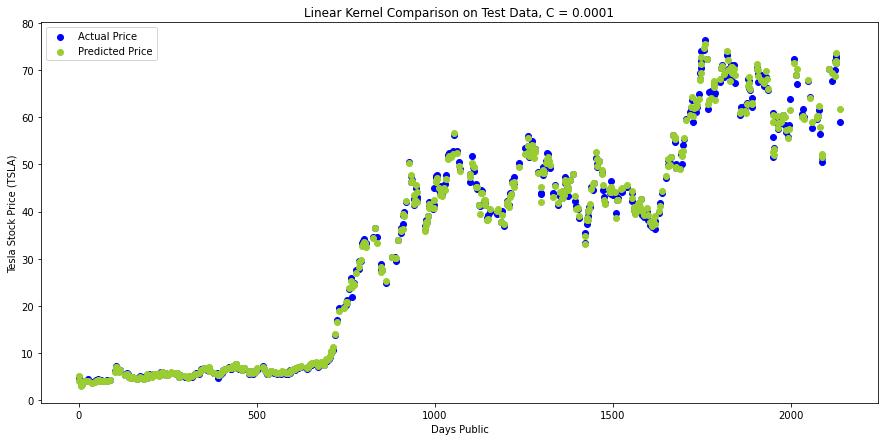

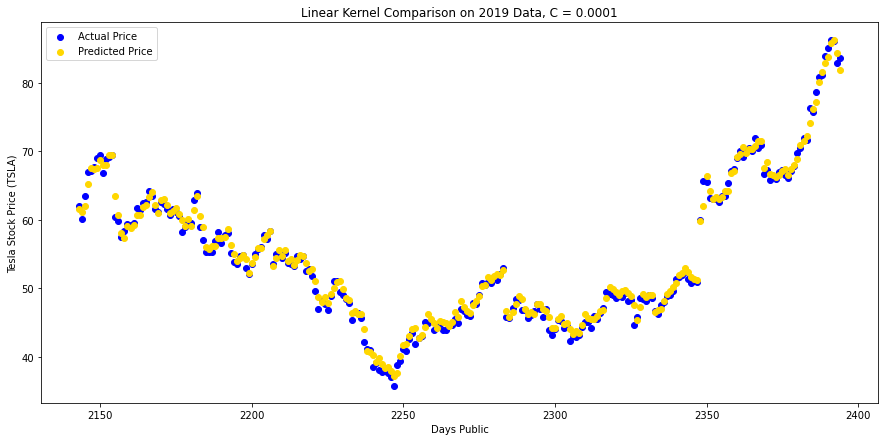

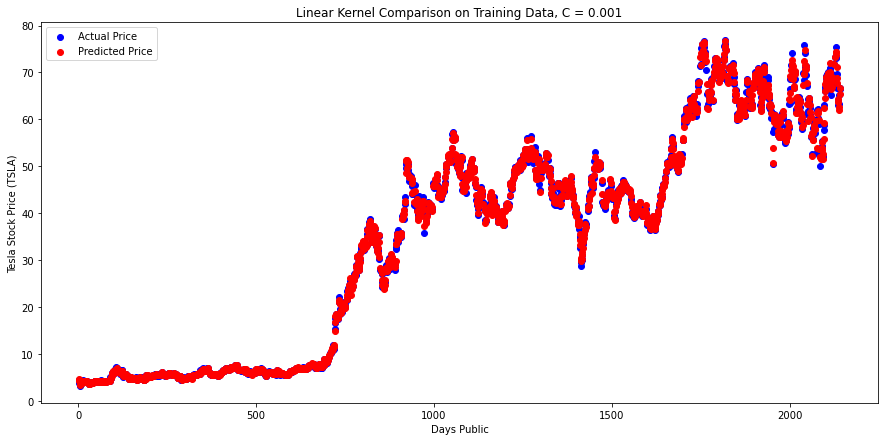

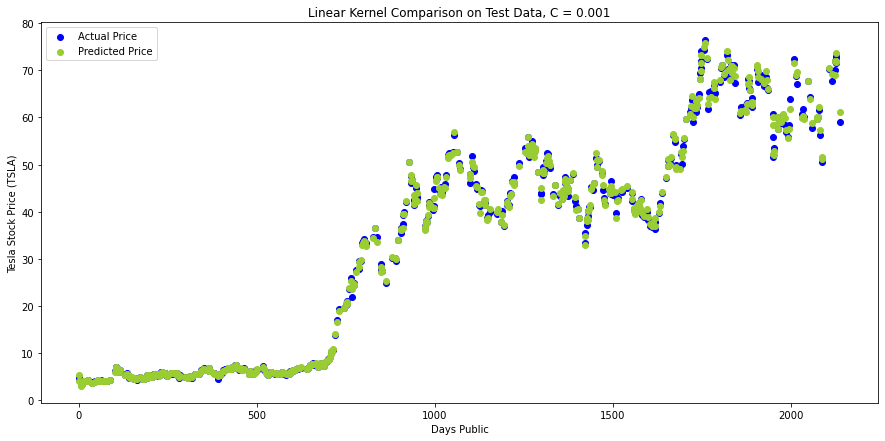

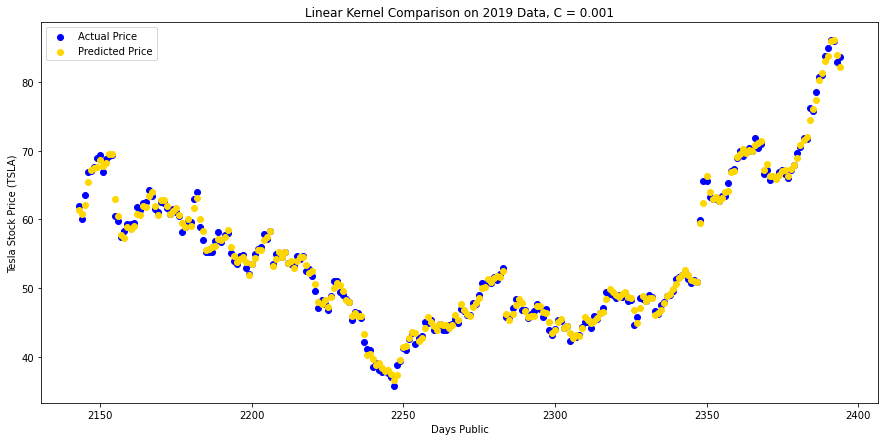

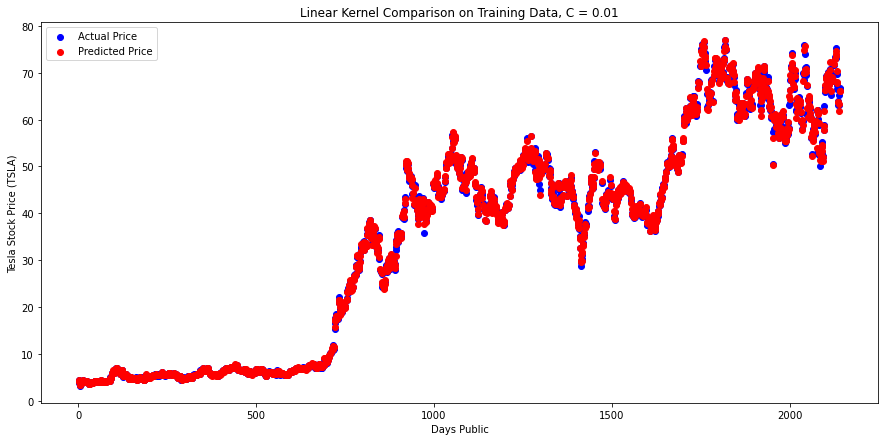

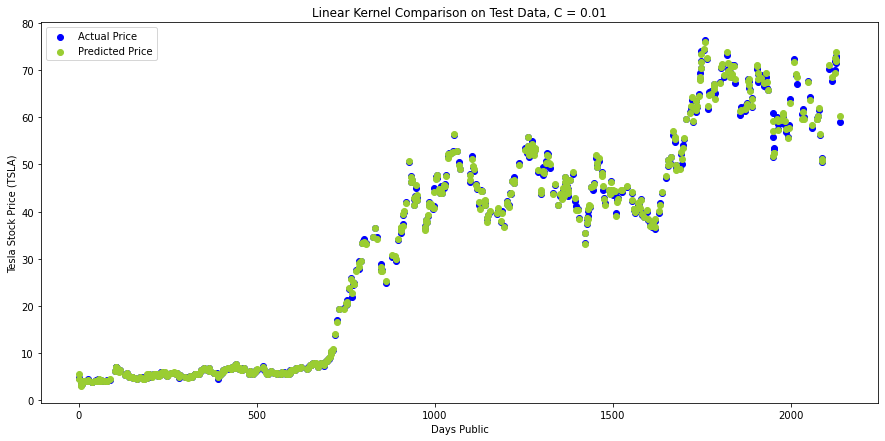

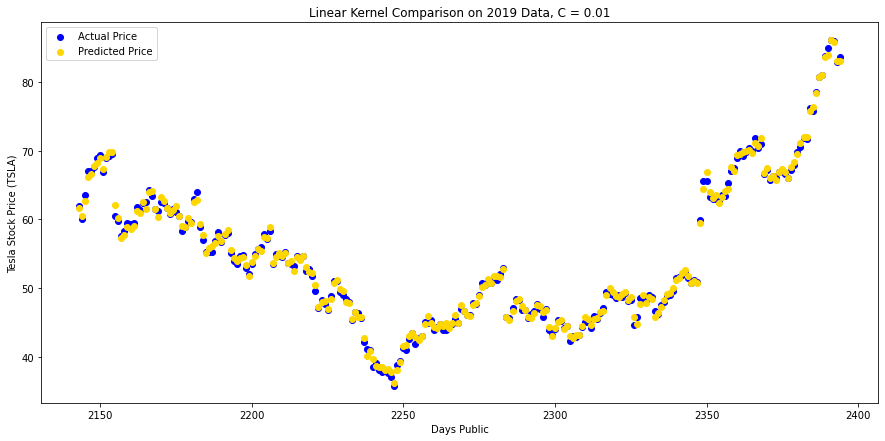

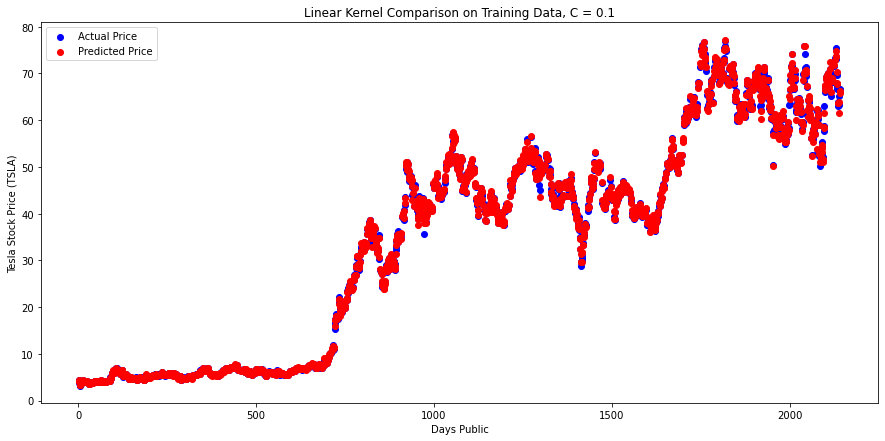

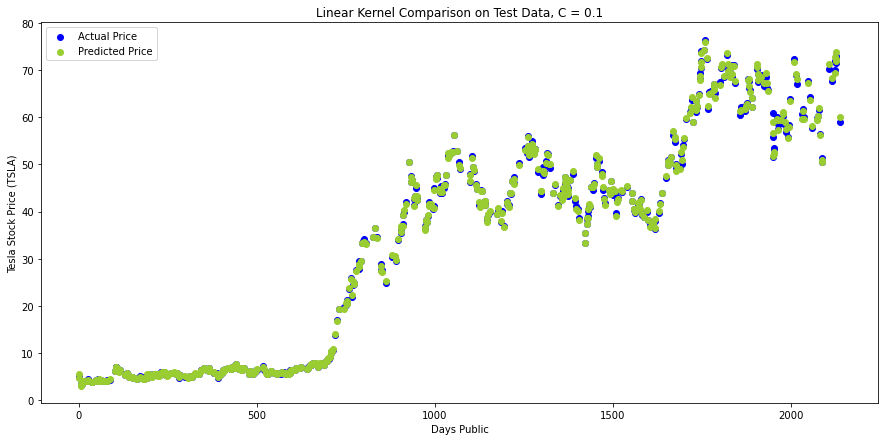

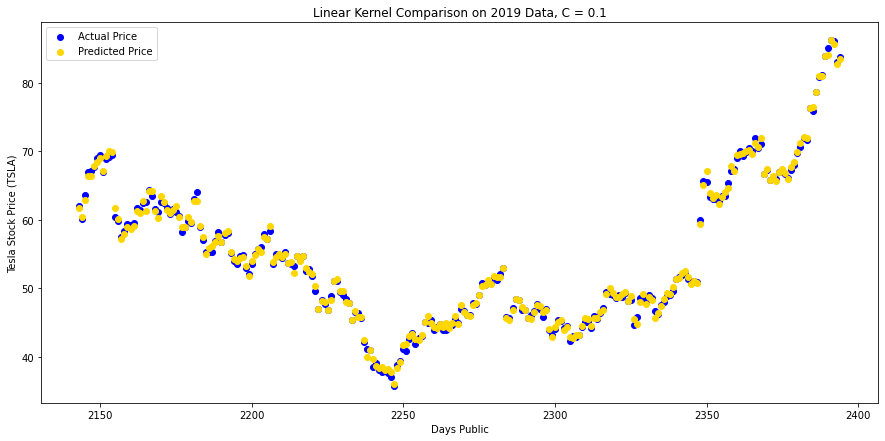

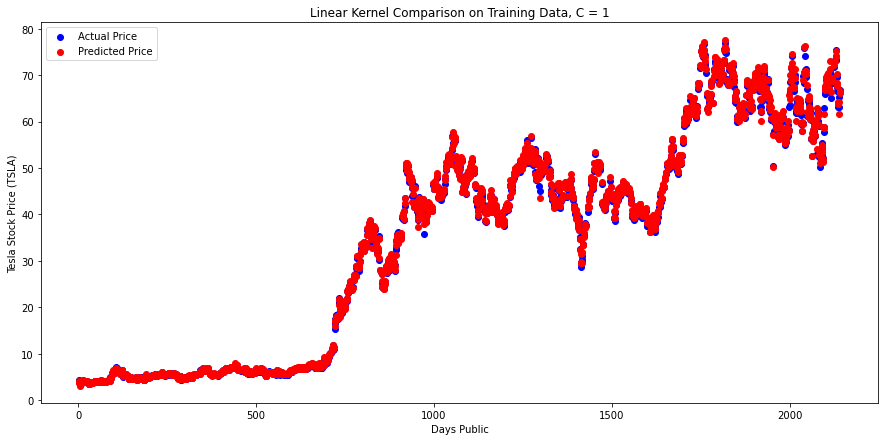

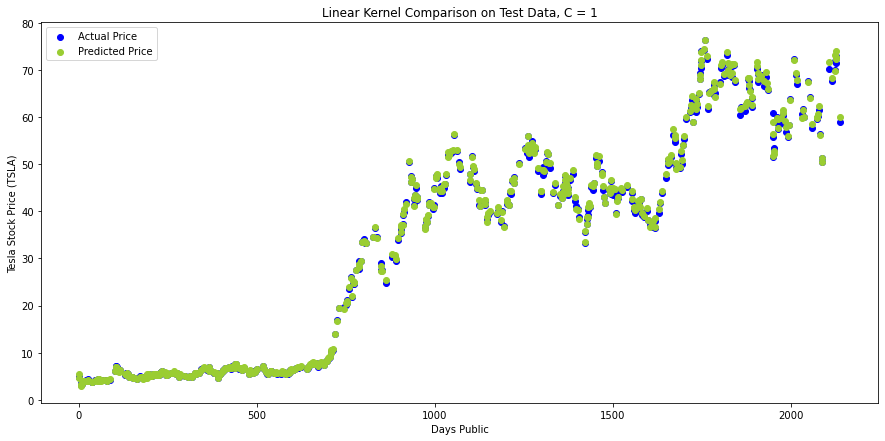

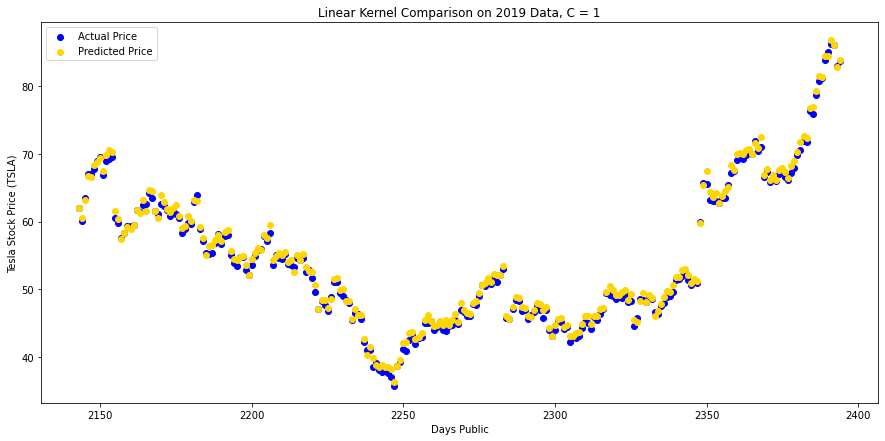

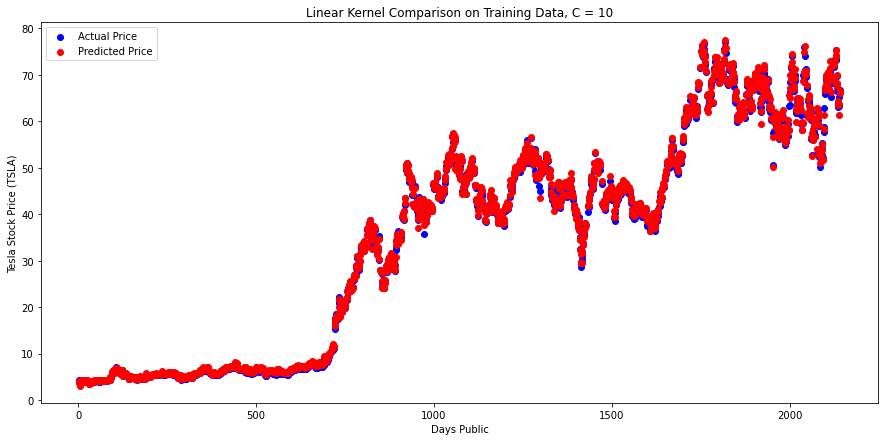

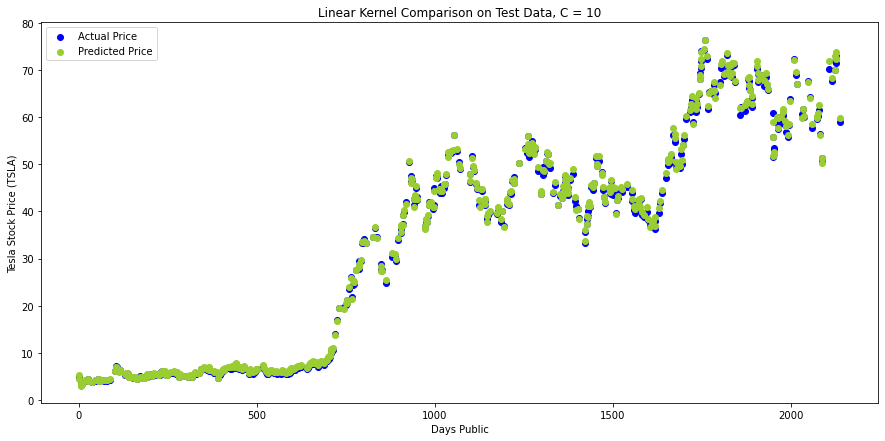

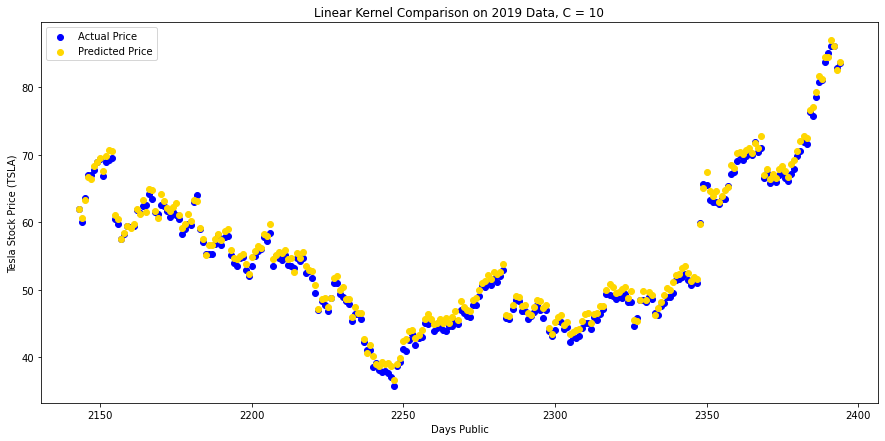

In [19]:
#This takes a while to fully execute, I'd recommend running the other kernels first
lin_train_accuracy = []
lin_test_accuracy = []
lin_accuracy_2019 = []
for c in cVals:
    svr_linear = svm.SVR(kernel = 'linear', C = c)
    svr_linear.fit(x_train, y_train)
    y_linear_train = svr_linear.predict(x_train)
    svm_confidence = svr_linear.score(x_train, y_train)
    lin_train_accuracy.append(svm_confidence)
    
    y_linear_test = svr_linear.predict(x_test)
    lin_acc = svr_linear.score(x_test, y_test)
    lin_test_accuracy.append(lin_acc)
    
    y_hat_2019_linear = svr_linear.predict(x_2019)
    lin_acc_2019 = svr_linear.score(x_2019, y_2019)
    lin_accuracy_2019.append(lin_acc_2019)
    
    train_title = "Linear Kernel Comparison on Training Data, C = " + str(c)
    test_title = "Linear Kernel Comparison on Test Data, C = " + str(c)
    title_2019 = "Linear Kernel Comparison on 2019 Data, C = " + str(c)
    plot_graph(x_train[:, 0], y_train, y_linear_train, c, train_title, 'r')
    plot_graph(x_test[:, 0], y_test, y_linear_test, c, test_title, 'yellowgreen')
    plot_graph(x_2019[:, 0], y_2019, y_hat_2019_linear, c, title_2019, 'gold')

In [20]:
print(cVals)
print(lin_train_accuracy)
print(lin_test_accuracy)
print(lin_accuracy_2019)

[0.0001, 0.001, 0.01, 0.1, 1, 10]
[0.9991544850909277, 0.9993935869938522, 0.9996895330167952, 0.9996985092368263, 0.9995864864842168, 0.9994551828357273]
[0.9991792820472432, 0.9994163873530051, 0.9997112121582477, 0.9997416607728493, 0.9996497378155, 0.9995463941567305]
[0.9932516981678254, 0.9958491138015341, 0.9979847111238714, 0.9981301111086884, 0.9962129524492042, 0.9926367710270383]


Text(0, 0.5, 'Accuracy')

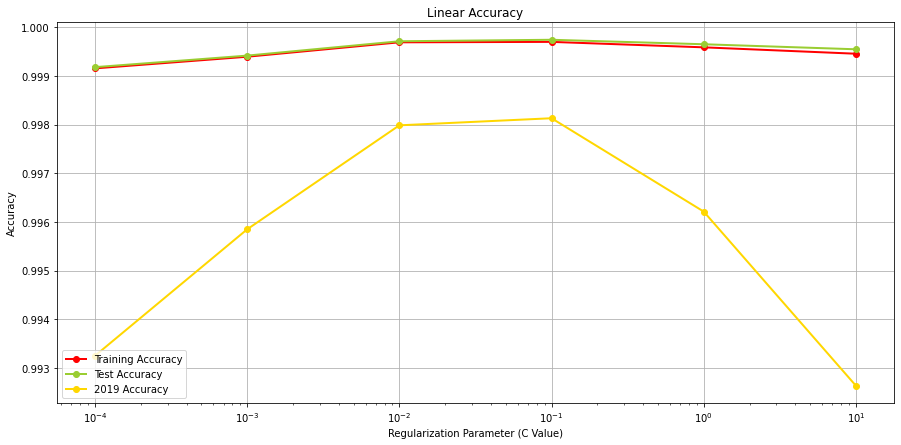

In [21]:
plt.figure(figsize=(15,7))
plt.plot(cVals, lin_train_accuracy, 'go-', c = 'r', linewidth = 2)
plt.plot(cVals, lin_test_accuracy, 'go-', c = 'yellowgreen', linewidth = 2)
plt.plot(cVals, lin_accuracy_2019, 'go-', c = 'gold', linewidth = 2)
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy', '2019 Accuracy'], loc='lower left')
plt.title("Linear Accuracy")
plt.xlabel('Regularization Parameter (C Value)')
plt.xscale("Log")
plt.ylabel('Accuracy')

# RBF Kernel

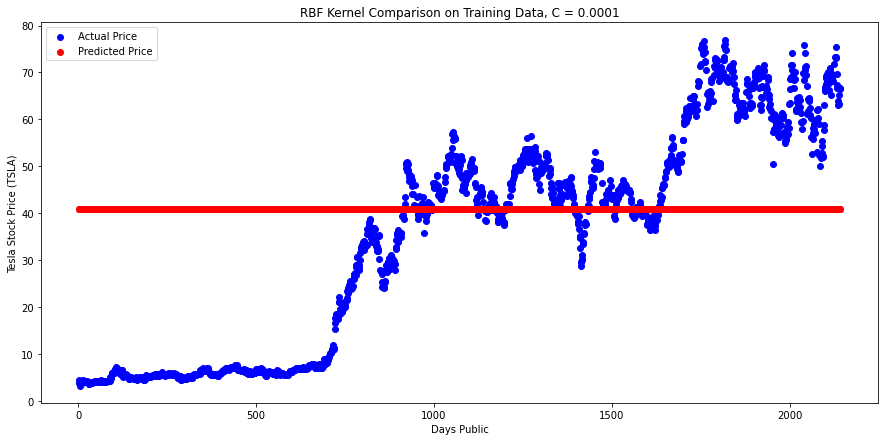

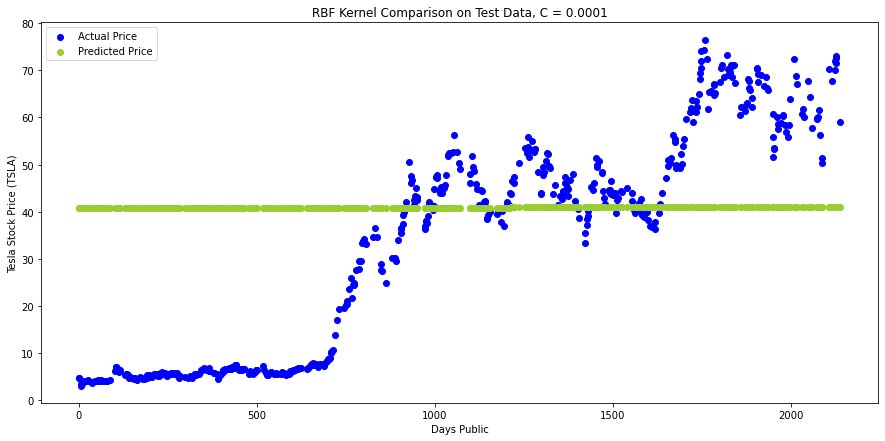

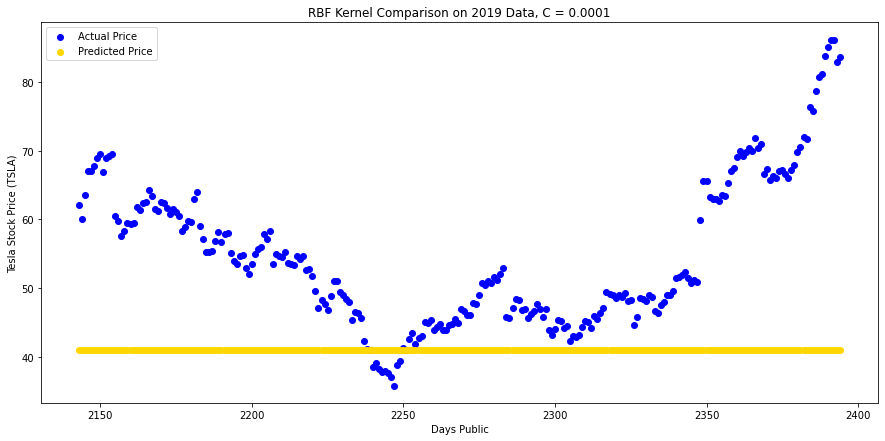

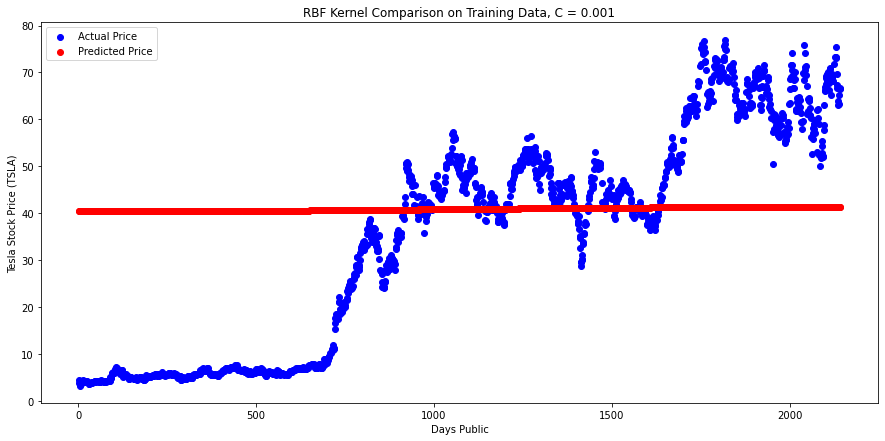

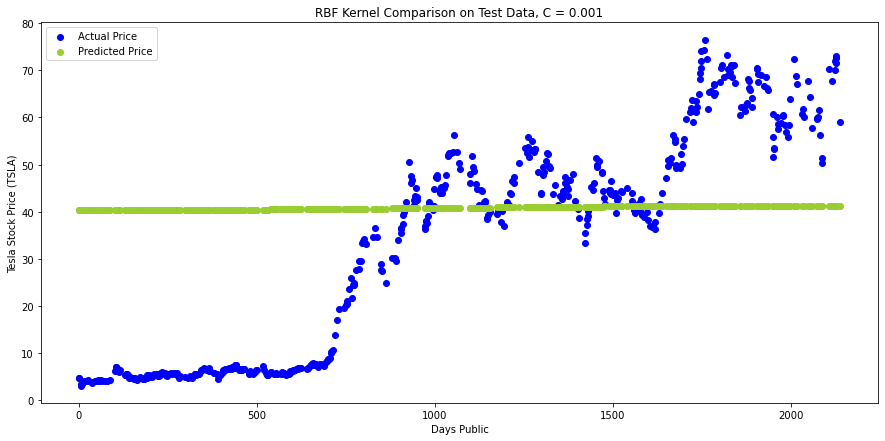

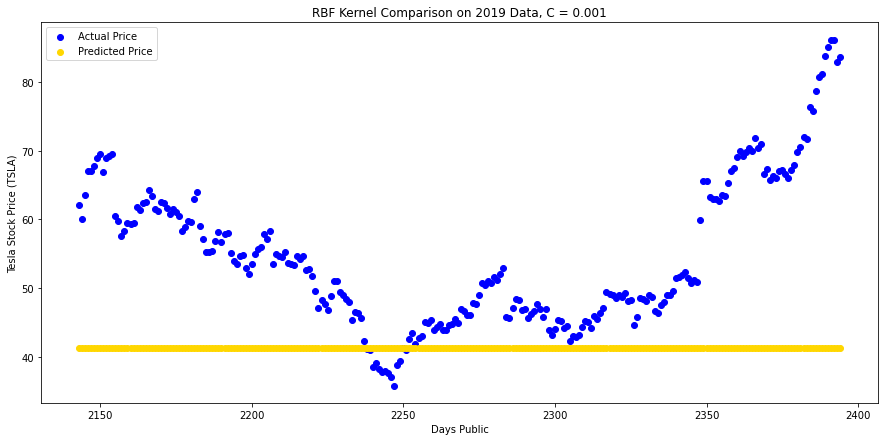

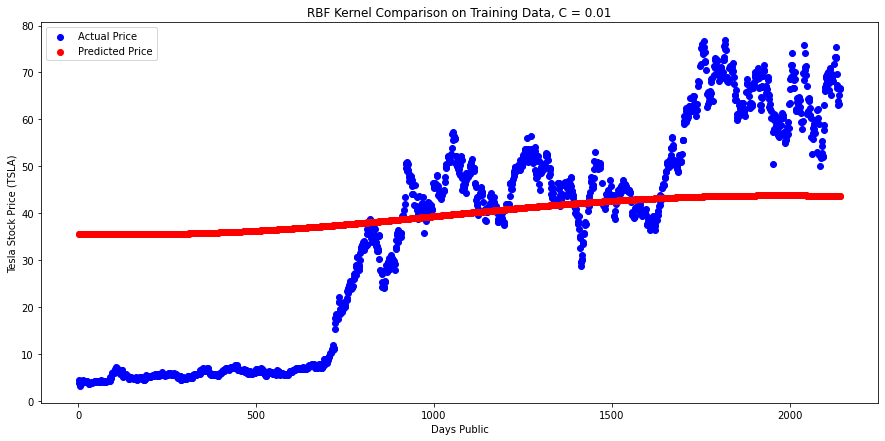

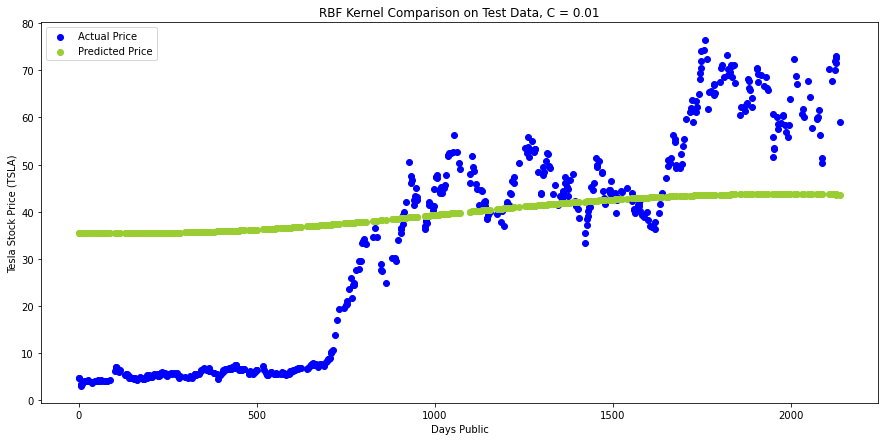

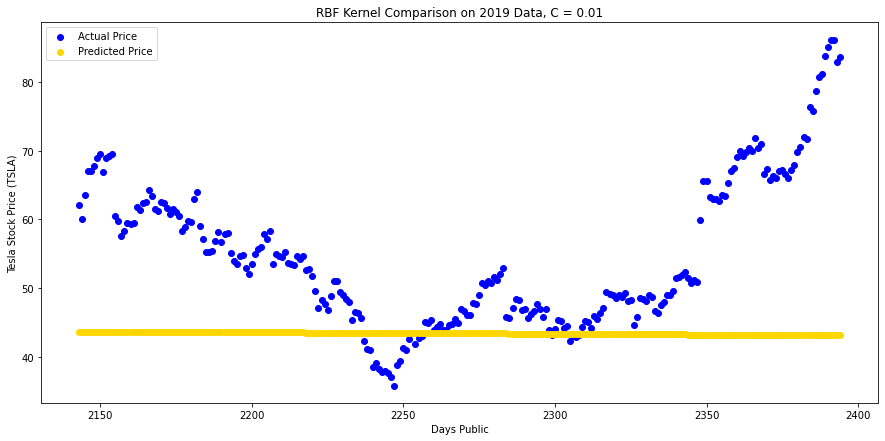

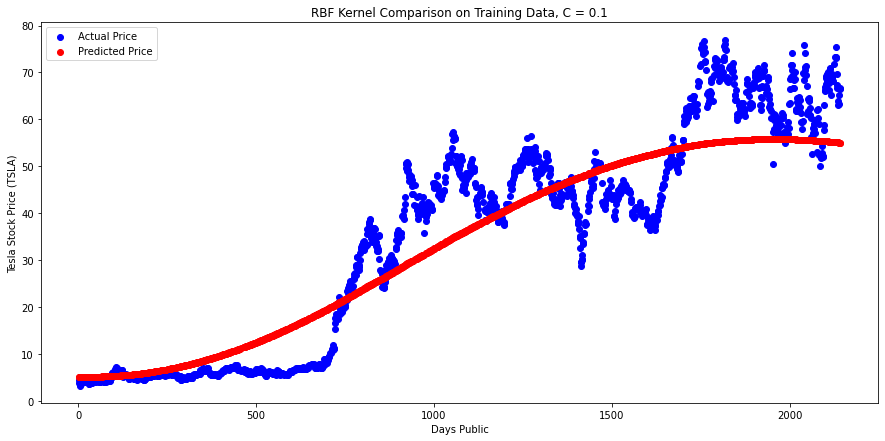

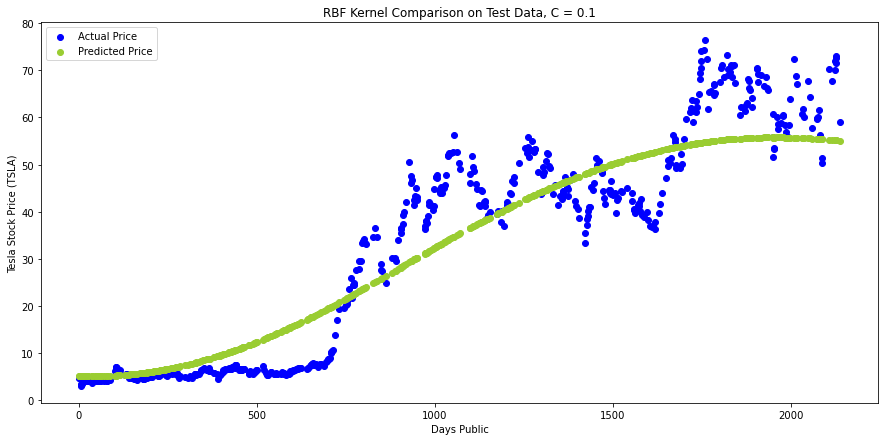

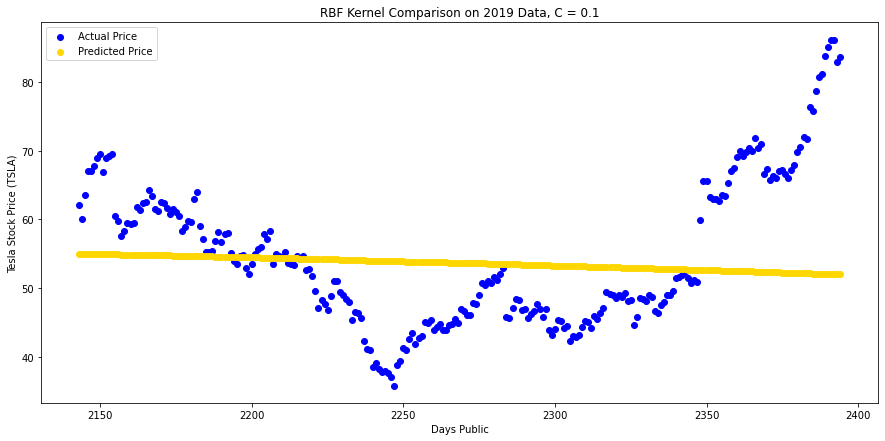

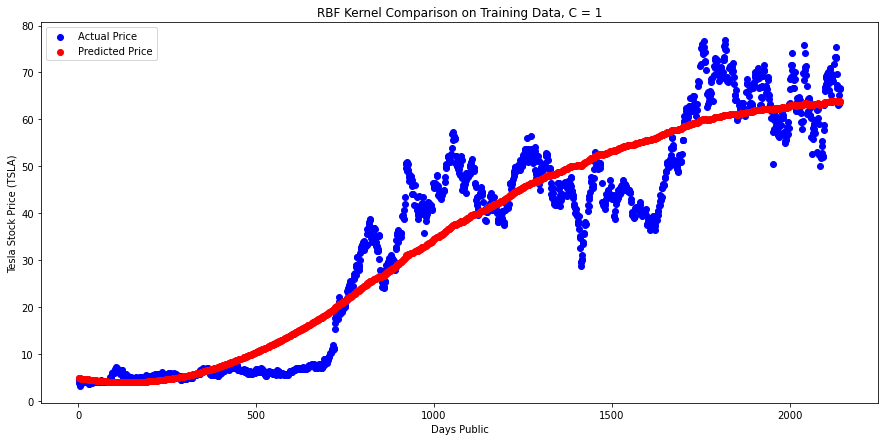

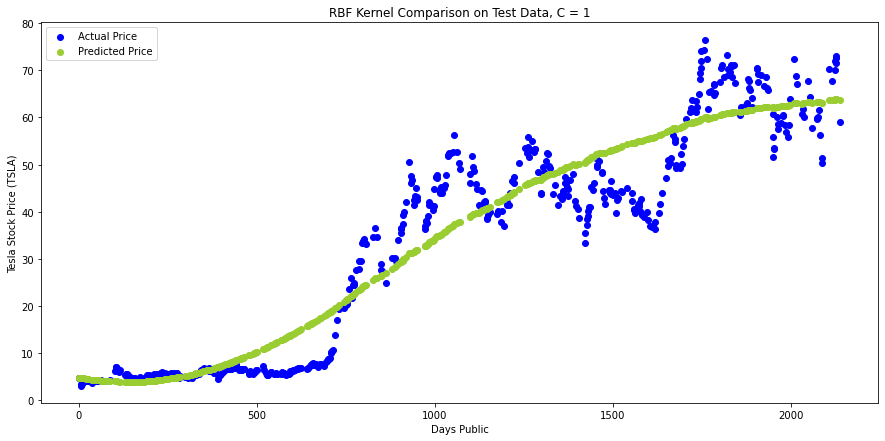

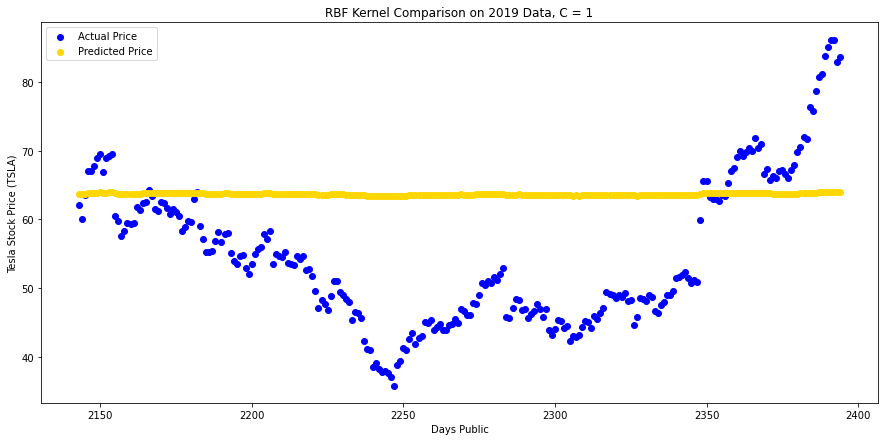

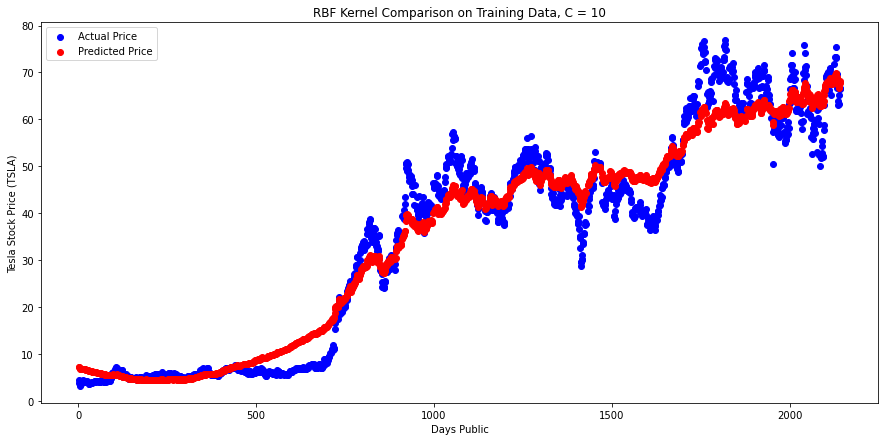

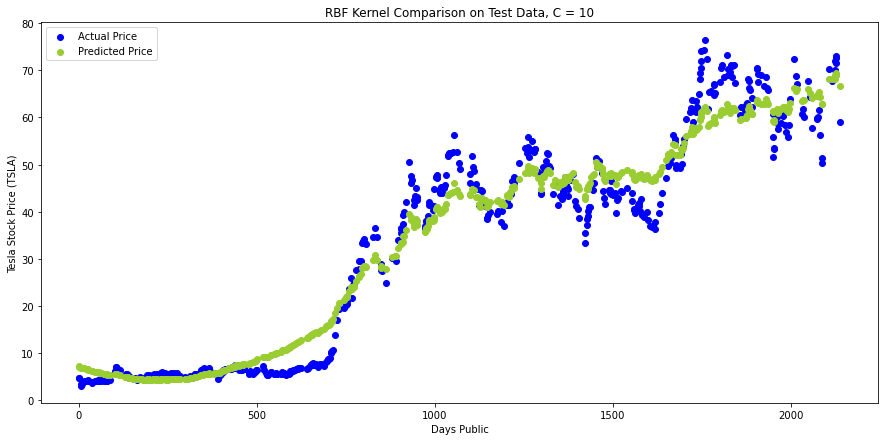

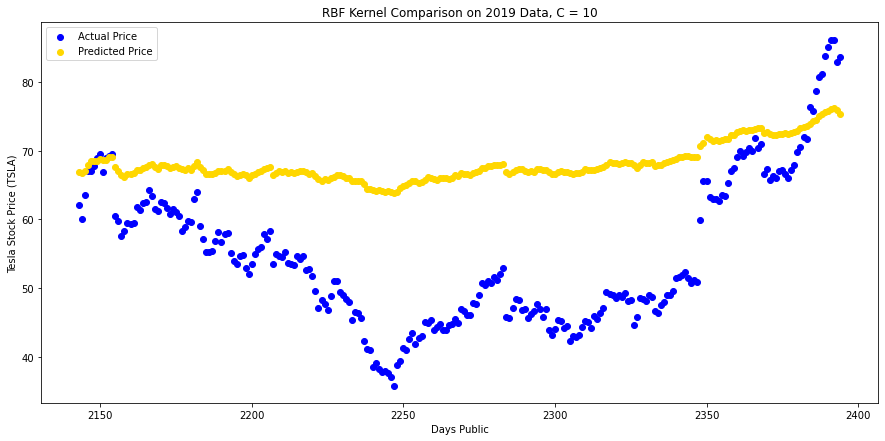

In [22]:
rbf_train_accuracy = []
rbf_test_accuracy = []
rbf_accuracy_2019 = []
for c in cVals:
    svr_rbf = svm.SVR(kernel = 'rbf', C = c)
    svr_rbf.fit(x_train, y_train)
    y_rbf_train = svr_rbf.predict(x_train)
    svm_confidence = svr_rbf.score(x_train, y_train)
    rbf_train_accuracy.append(svm_confidence)
    
    y_rbf_test = svr_rbf.predict(x_test)
    rbf_acc = svr_rbf.score(x_test, y_test)
    rbf_test_accuracy.append(rbf_acc)
    
    y_hat_rbf_2019 = svr_rbf.predict(x_2019)
    rbf_2019_acc = svr_rbf.score(x_2019, y_2019)
    rbf_accuracy_2019.append(rbf_2019_acc)
    train_title = "RBF Kernel Comparison on Training Data, C = " + str(c)
    test_title = "RBF Kernel Comparison on Test Data, C = " + str(c)
    title_2019 = "RBF Kernel Comparison on 2019 Data, C = " + str(c)
    plot_graph(x_train[:, 0], y_train, y_rbf_train, c, train_title, 'r')
    plot_graph(x_test[:, 0], y_test, y_rbf_test, c, test_title, 'yellowgreen')
    plot_graph(x_2019[:, 0], y_2019, y_hat_rbf_2019, c, title_2019, 'gold')

In [23]:
print(cVals)
print(rbf_train_accuracy)
print(rbf_test_accuracy)
print(rbf_accuracy_2019)

[0.0001, 0.001, 0.01, 0.1, 1, 10]
[-0.05871724926831767, -0.03379313200230505, 0.19702447923624022, 0.8577758588209166, 0.8942012601354669, 0.959398955325856]
[-0.13294494789895506, -0.10617909008631621, 0.14622932400593136, 0.8745413636680333, 0.9054211945706231, 0.9631364578531367]
[-1.6920682715954674, -1.6231095759258176, -1.1499594507548556, -0.055139972130383574, -0.6919252990387779, -1.2373140167332028]


Text(0, 0.5, 'Accuracy')

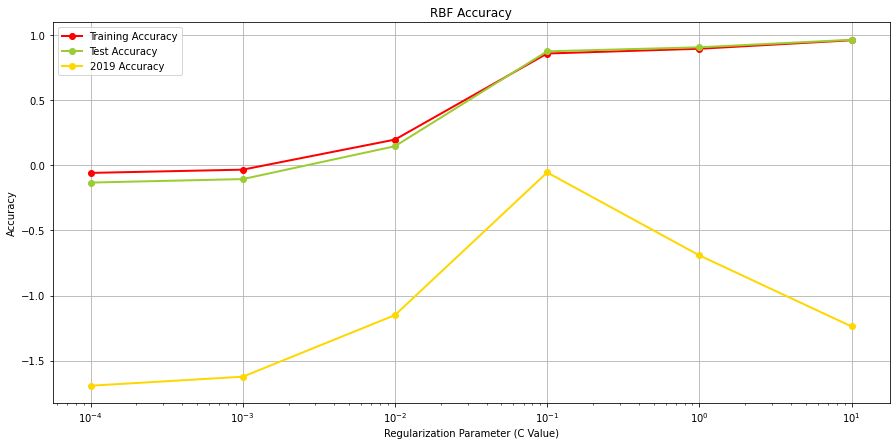

In [24]:
plt.figure(figsize=(15,7))
plt.plot(cVals, rbf_train_accuracy, 'go-' , c = 'r', linewidth = 2)
plt.plot(cVals, rbf_test_accuracy, 'go-', c = 'yellowgreen', linewidth = 2)
plt.plot(cVals, rbf_accuracy_2019, 'go-', c = 'gold', linewidth = 2)
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy', '2019 Accuracy'], loc='upper left')
plt.title("RBF Accuracy")
plt.xlabel('Regularization Parameter (C Value)')
plt.xscale("Log")
plt.ylabel('Accuracy')

# Polynomial Kernel (tested degrees 2, 3, and 4)

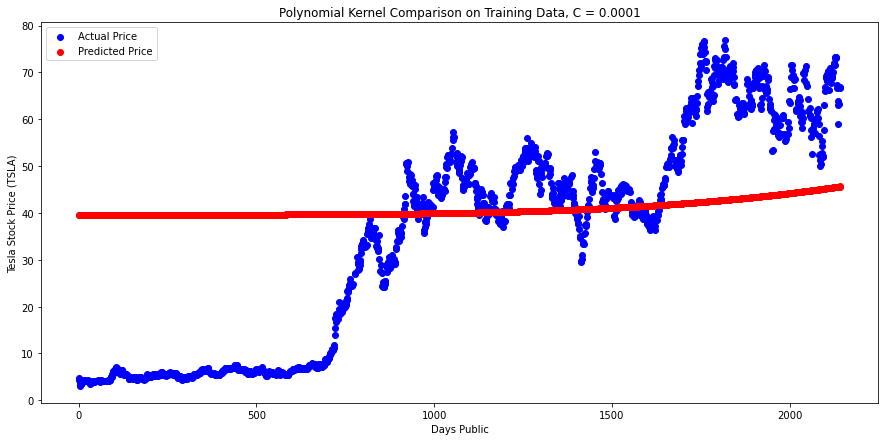

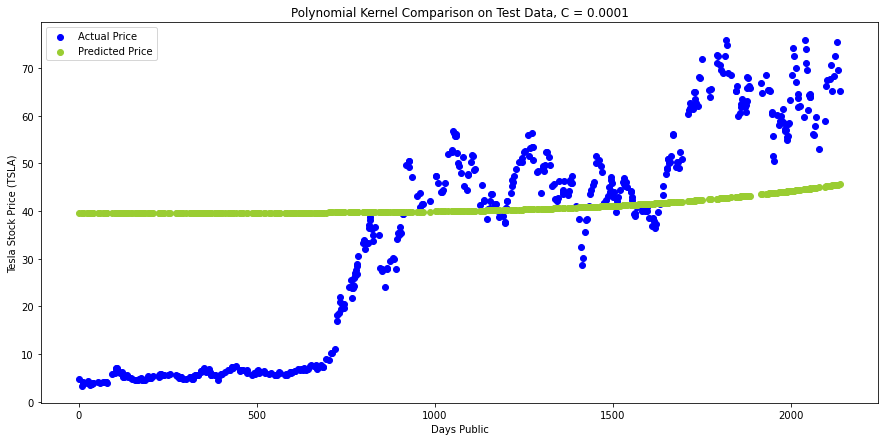

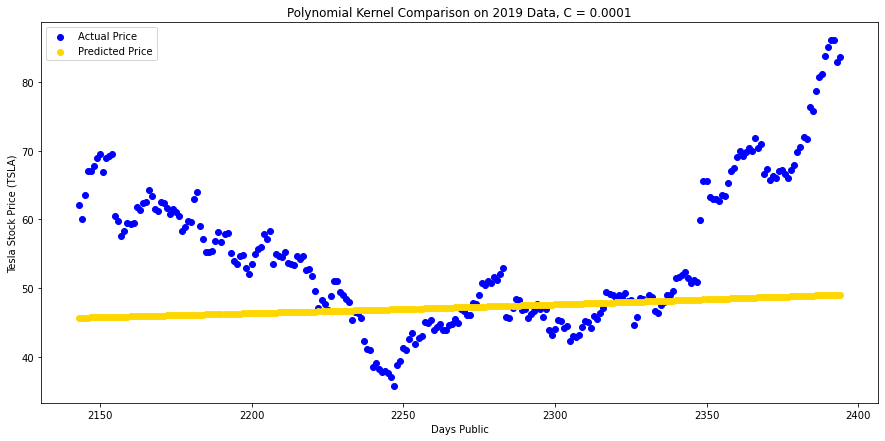

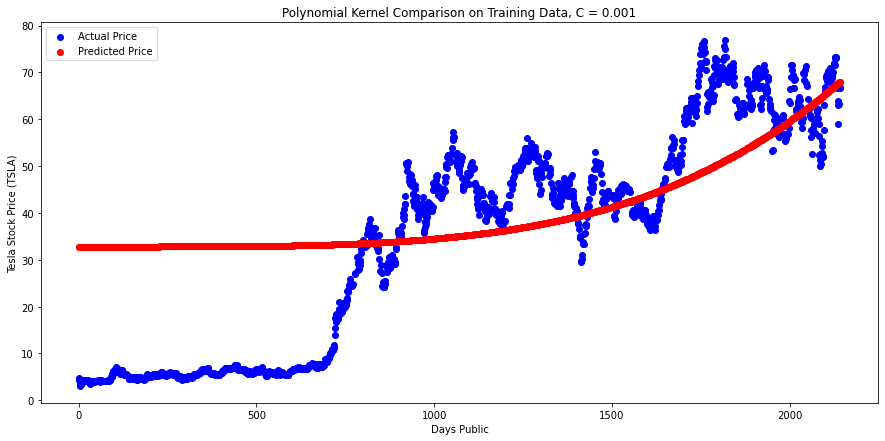

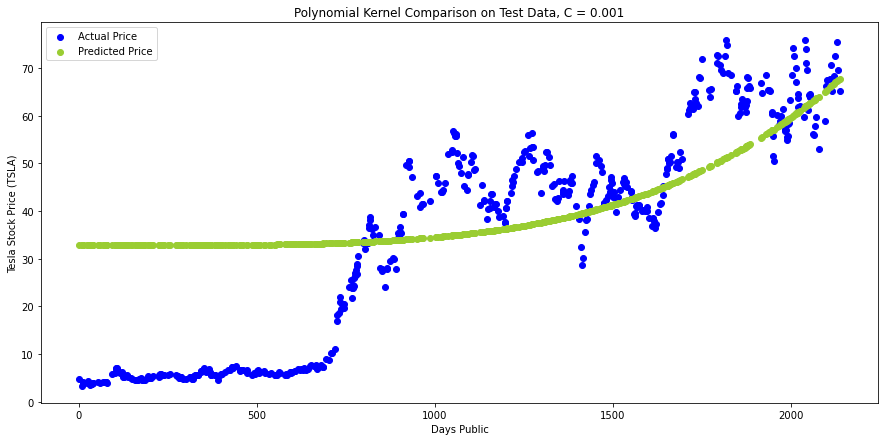

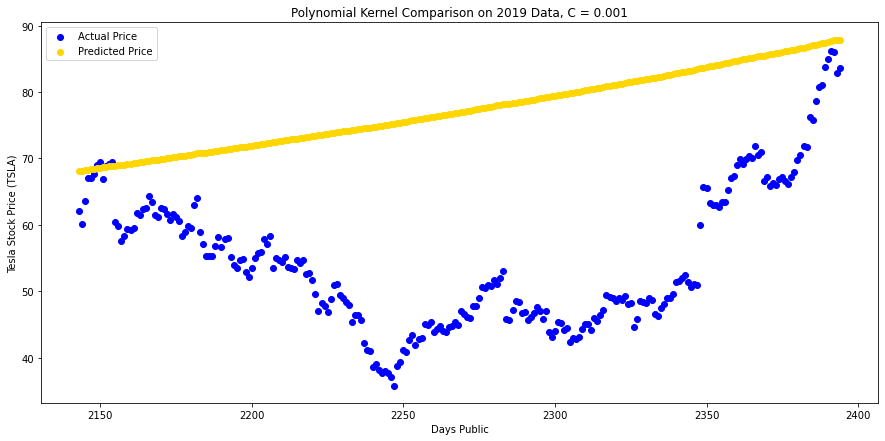

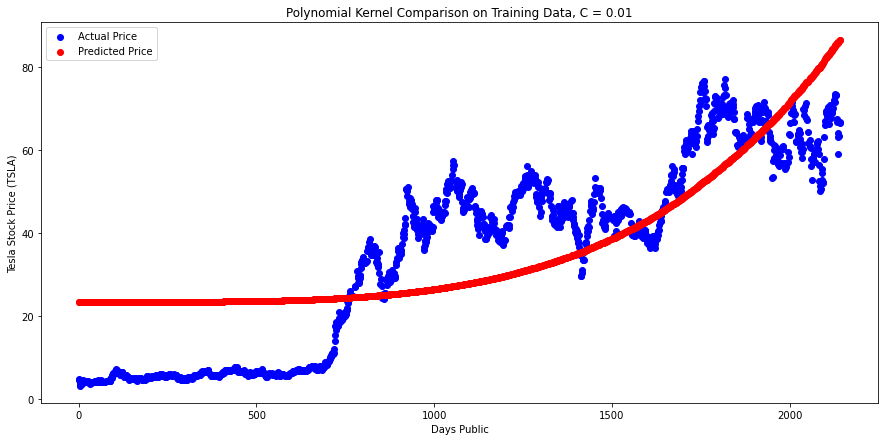

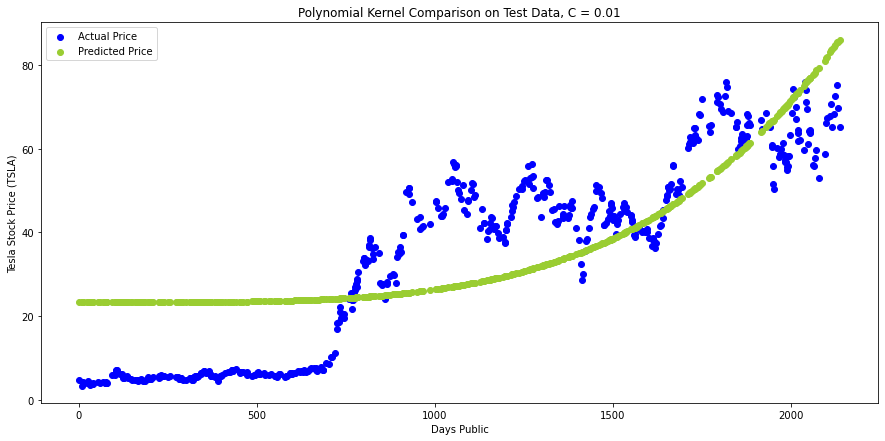

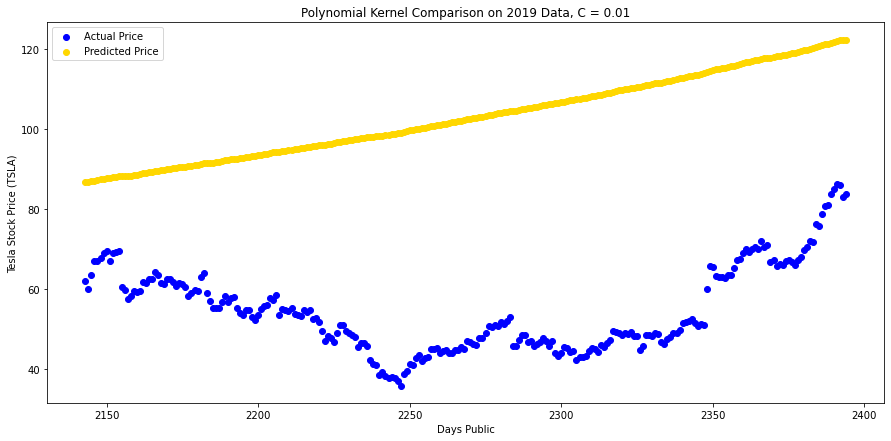

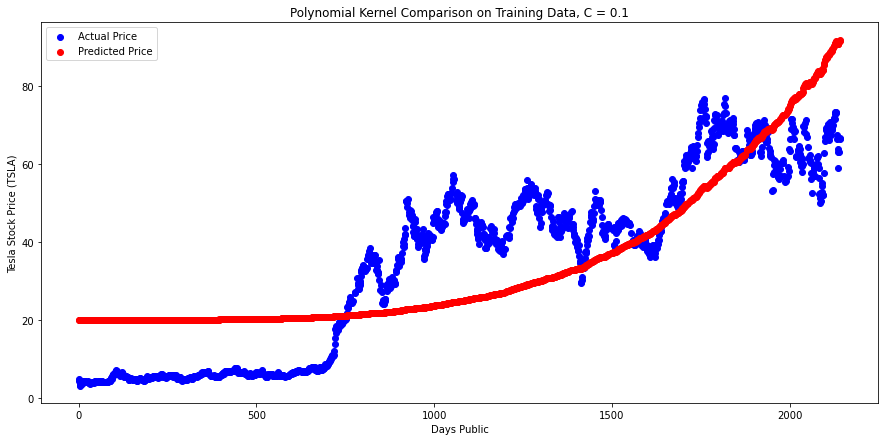

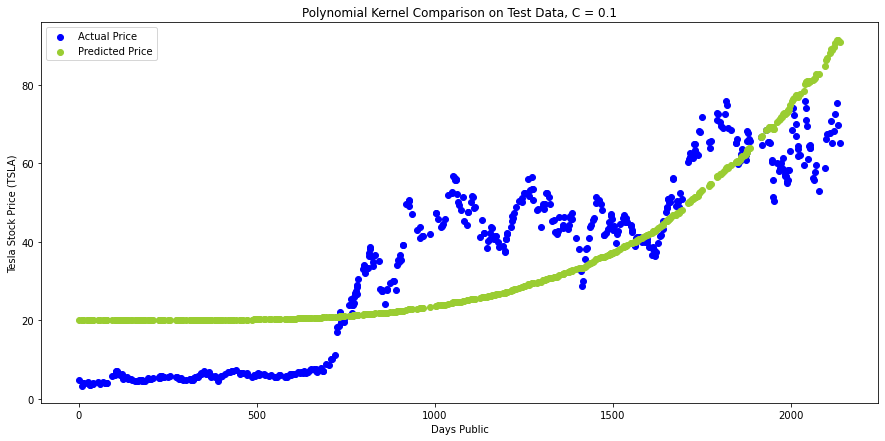

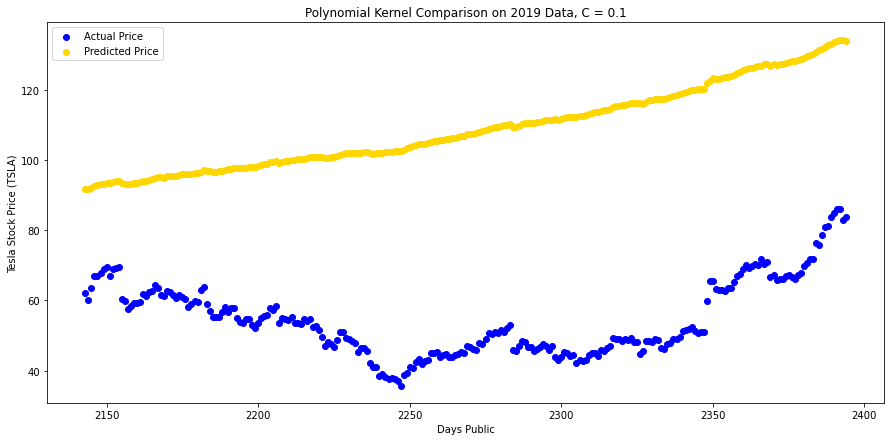

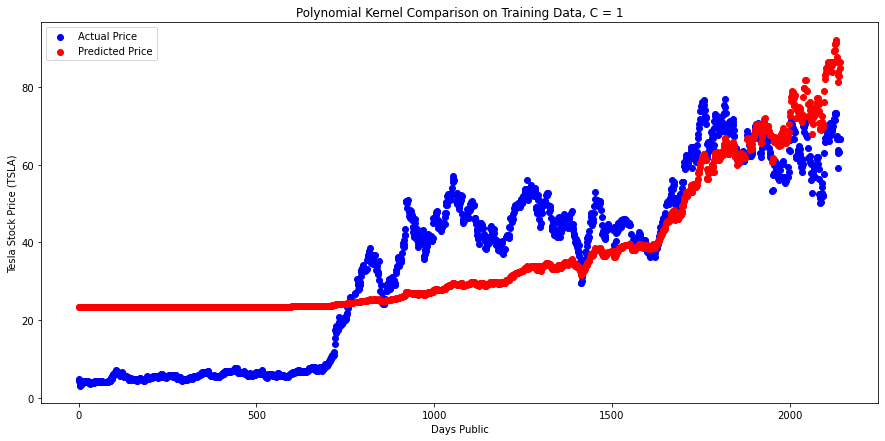

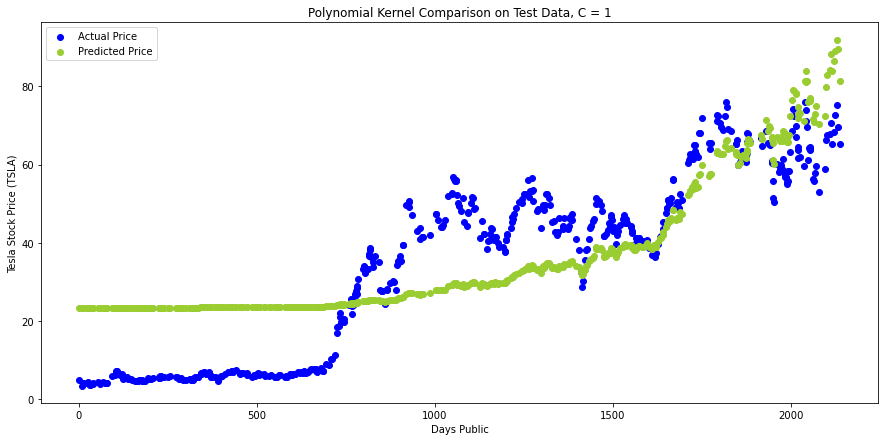

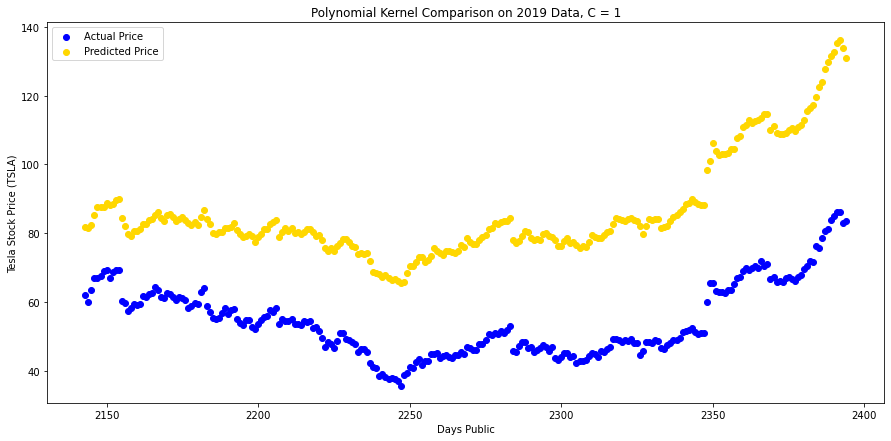

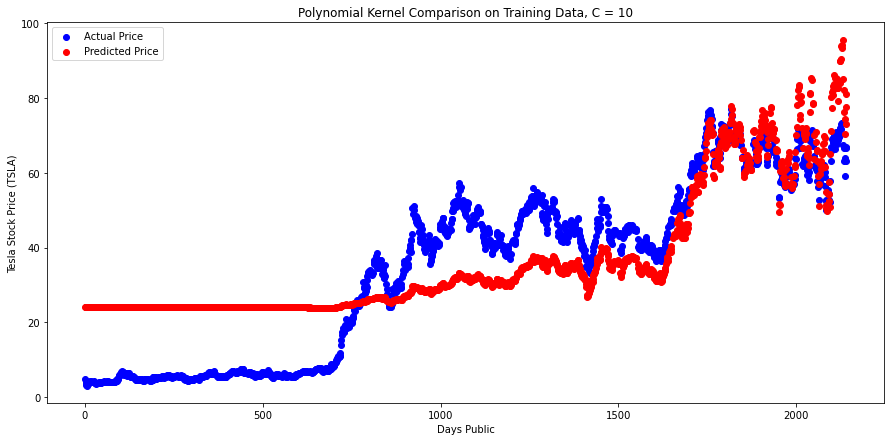

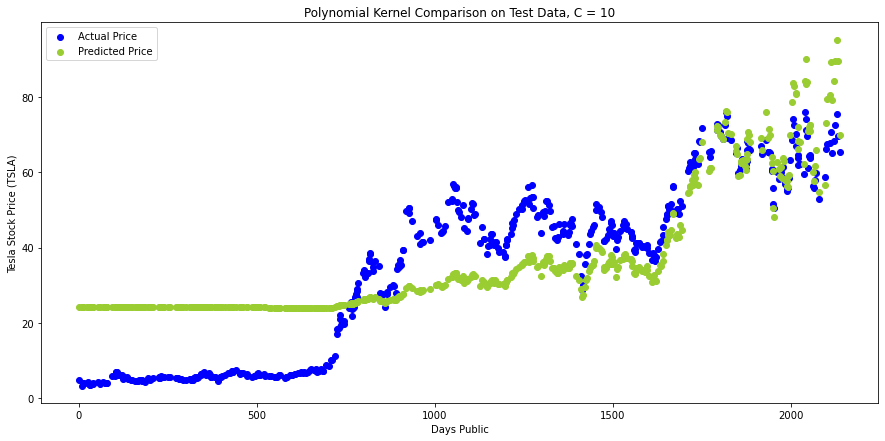

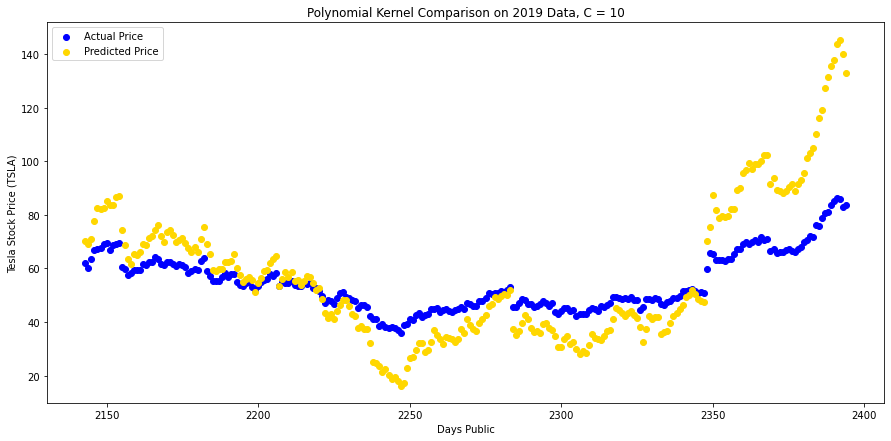

In [20]:
poly_train_accuracy = []
poly_test_accuracy = []
poly_accuracy_2019 = []
for c in cVals:
    svr_poly = svm.SVR(kernel = 'poly', C = c, degree = 4) # I use degrees 2, 3, and 4
    svr_poly.fit(x_train, y_train)
    y_poly_train = svr_poly.predict(x_train)
    svm_confidence = svr_poly.score(x_train, y_train)
    poly_train_accuracy.append(svm_confidence)
    
    y_poly_test = svr_poly.predict(x_test)
    poly_acc = svr_poly.score(x_test, y_test)
    poly_test_accuracy.append(poly_acc)
    
    y_hat_2019_poly = svr_poly.predict(x_2019)
    poly_acc_2019 = svr_poly.score(x_2019, y_2019)
    poly_accuracy_2019.append(poly_acc_2019)
    
    train_title = "Polynomial Kernel Comparison on Training Data, C = " + str(c)
    test_title = "Polynomial Kernel Comparison on Test Data, C = " + str(c)
    title_2019 = "Polynomial Kernel Comparison on 2019 Data, C = " + str(c)
    plot_graph(x_train[:, 0], y_train, y_poly_train, c, train_title, 'r')
    plot_graph(x_test[:, 0], y_test, y_poly_test, c, test_title, 'yellowgreen')
    plot_graph(x_2019[:, 0], y_2019, y_hat_2019_poly, c, title_2019, 'gold')
    

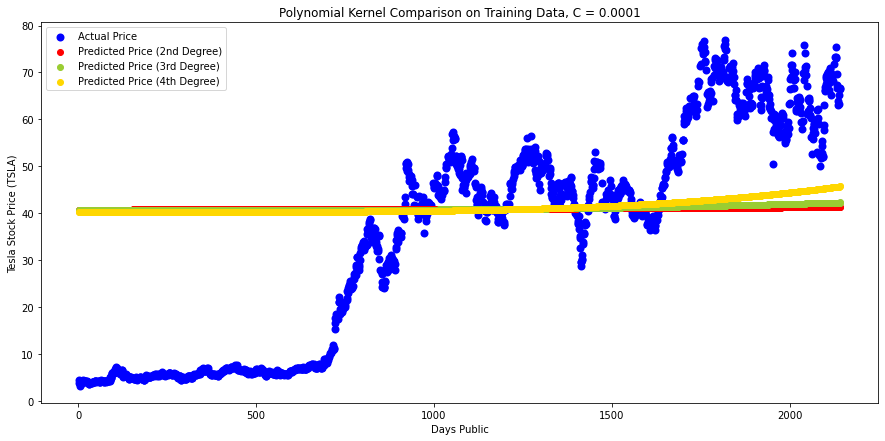

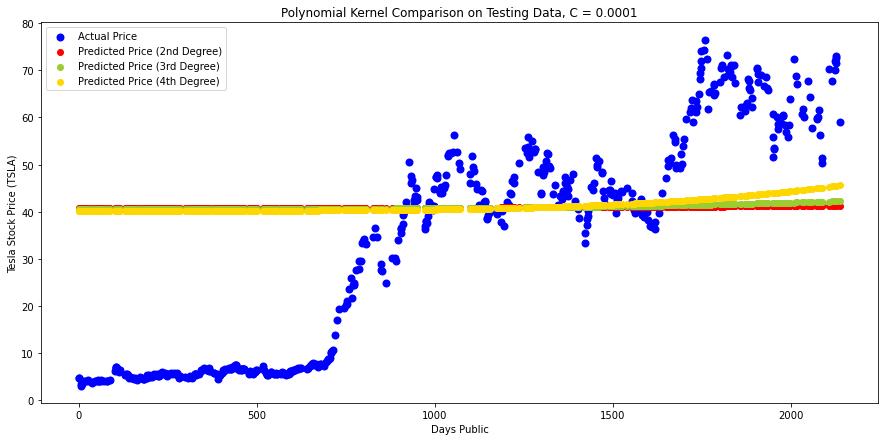

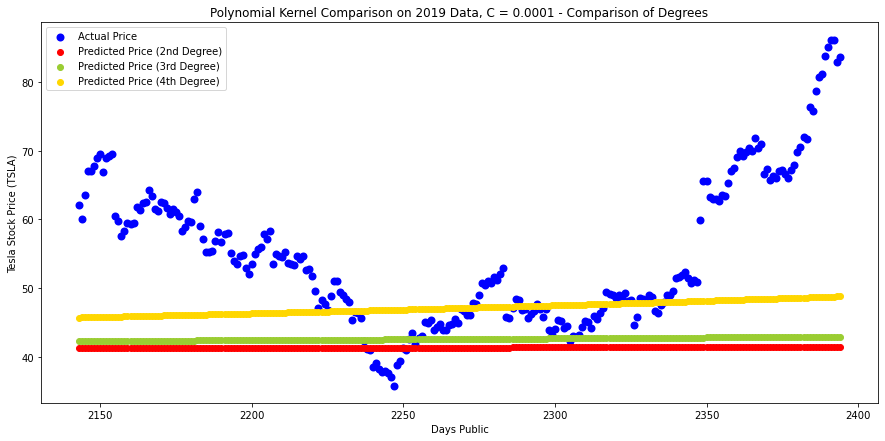

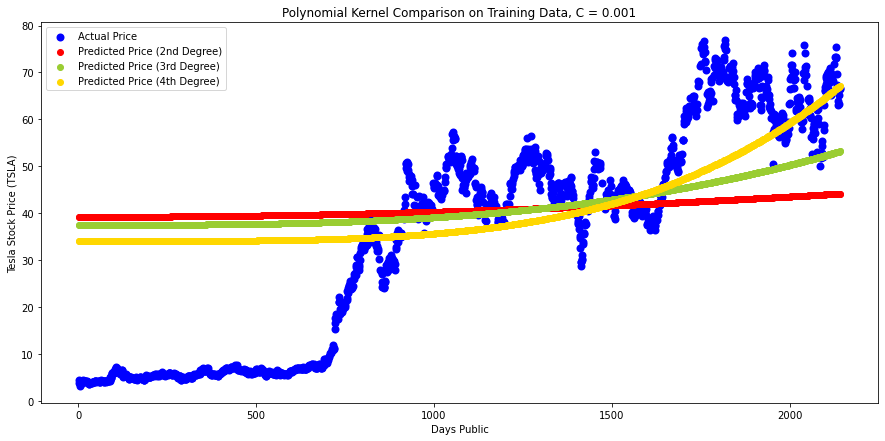

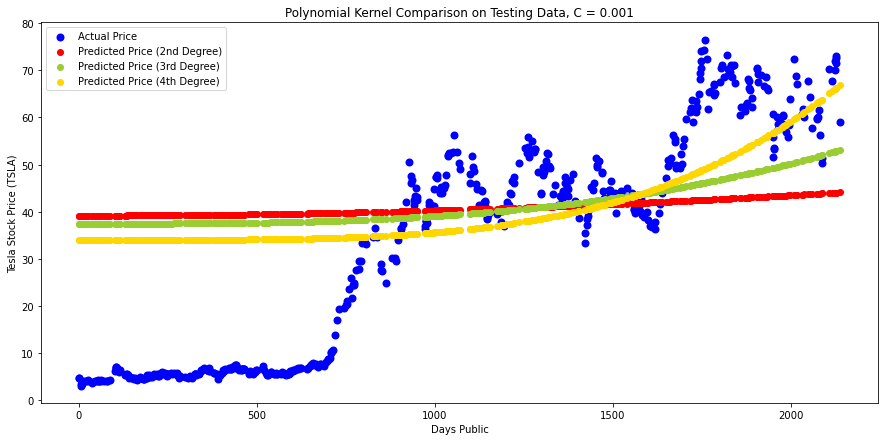

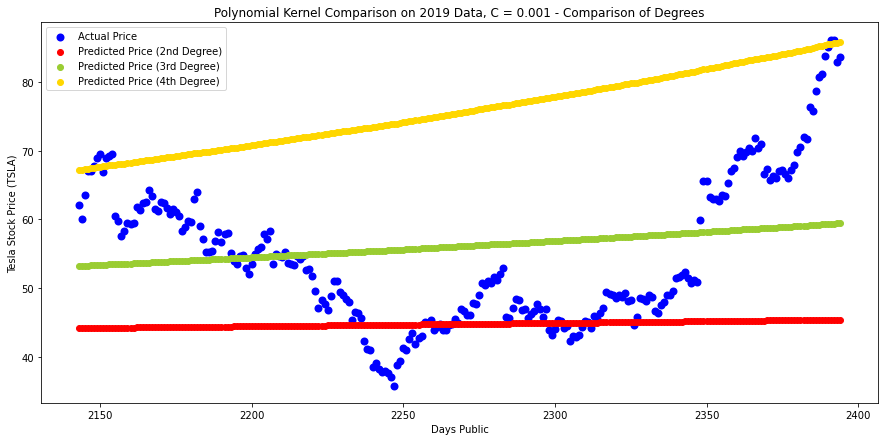

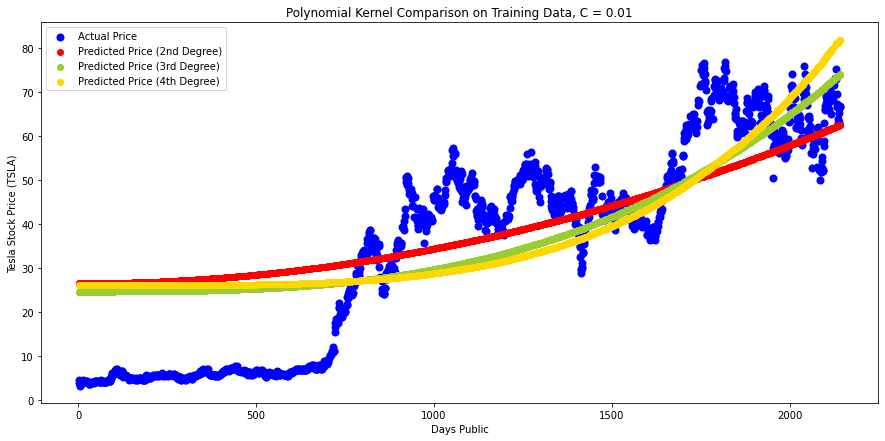

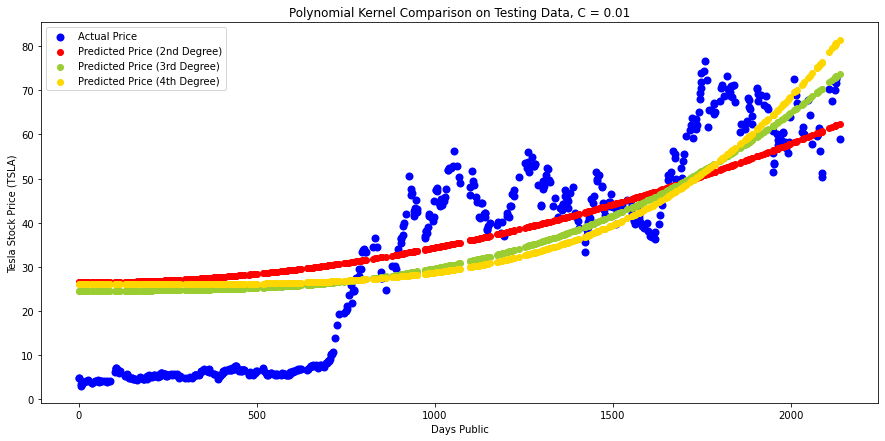

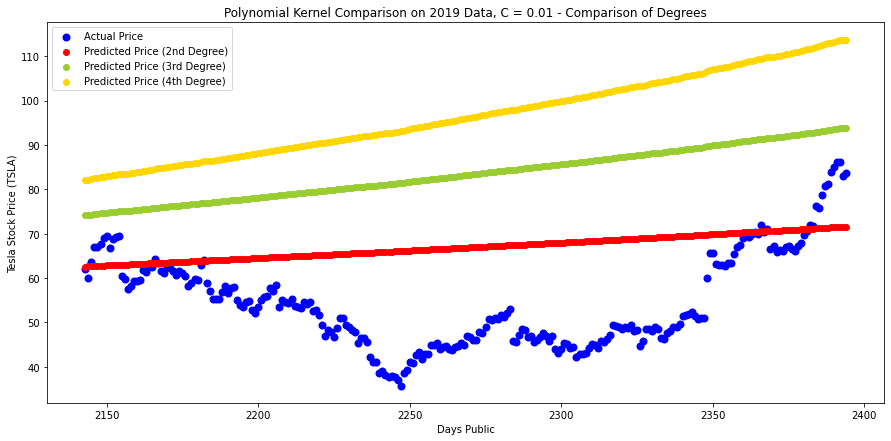

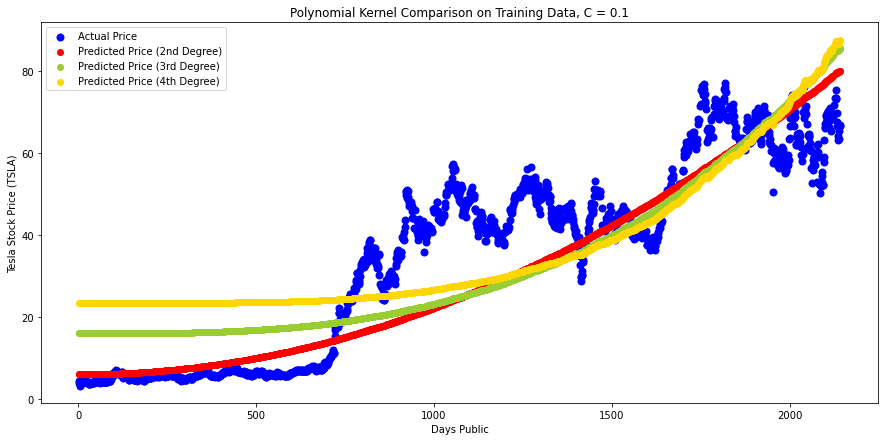

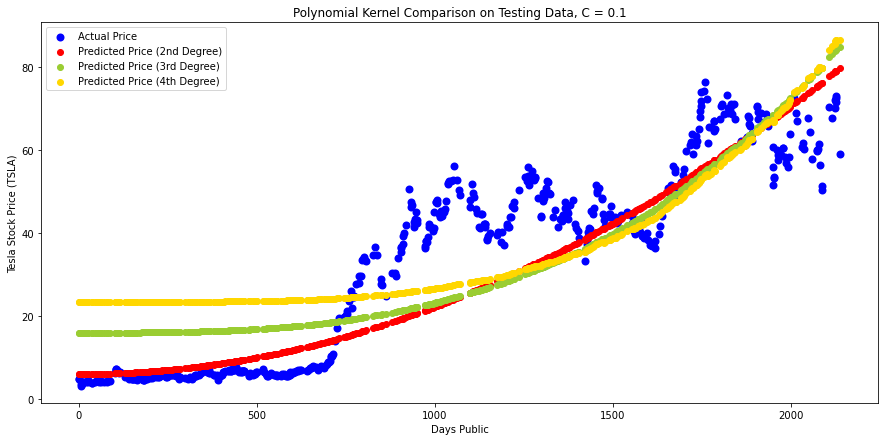

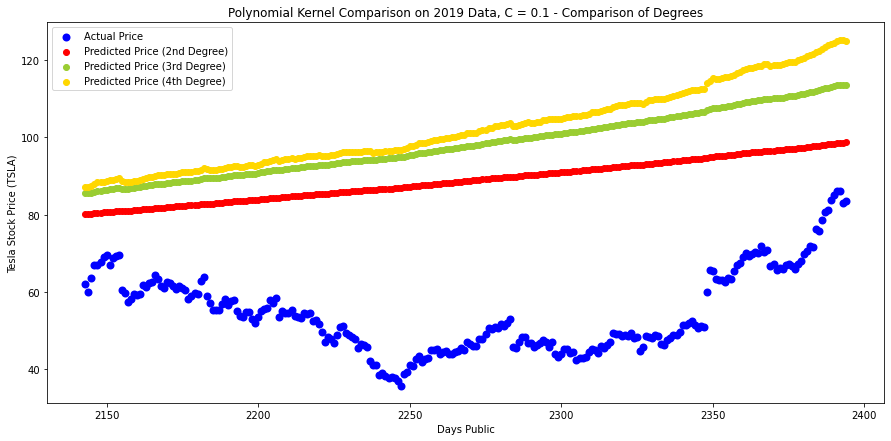

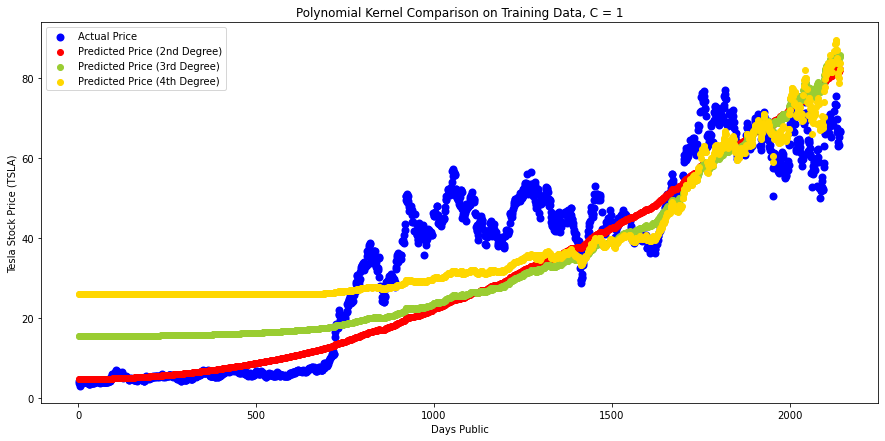

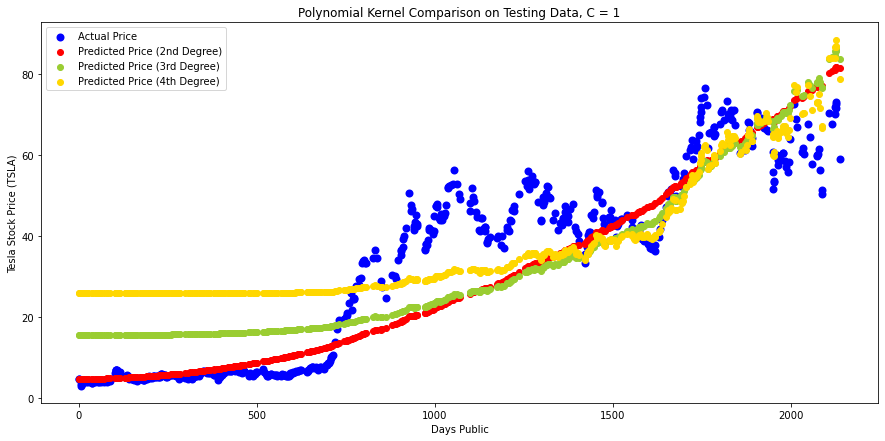

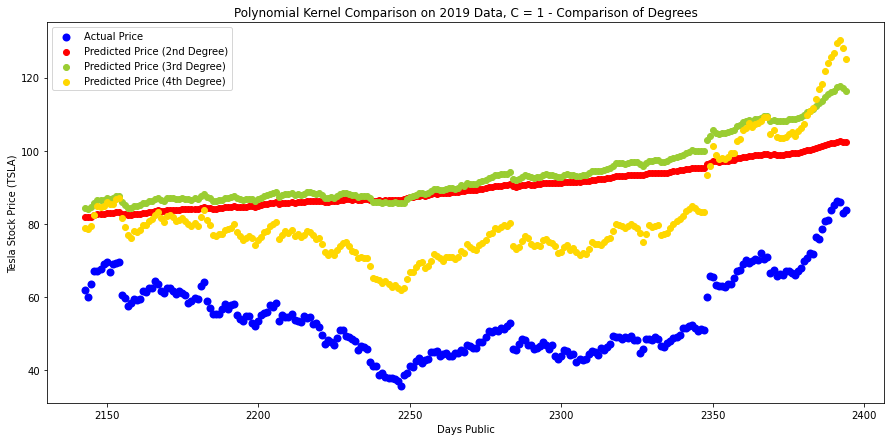

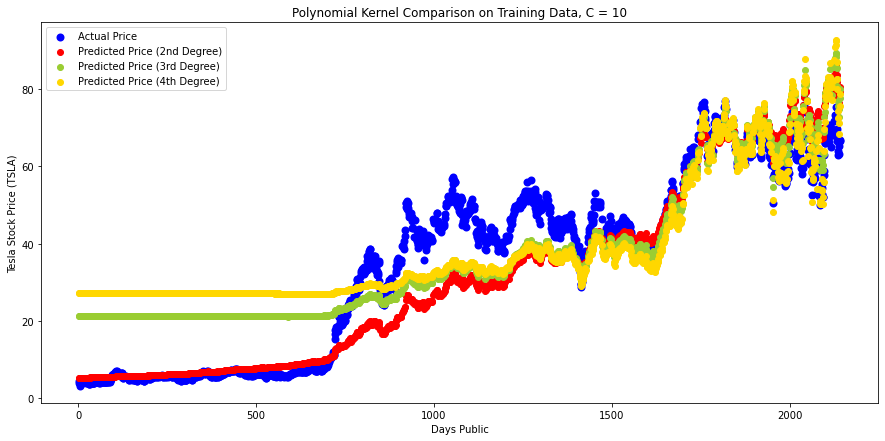

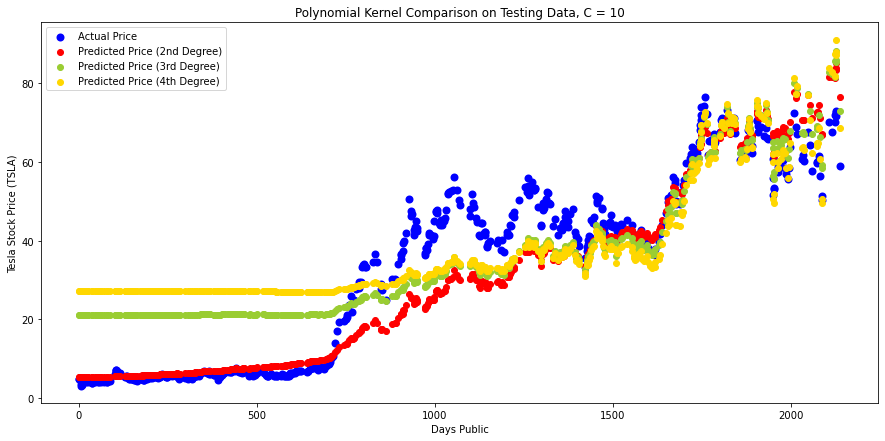

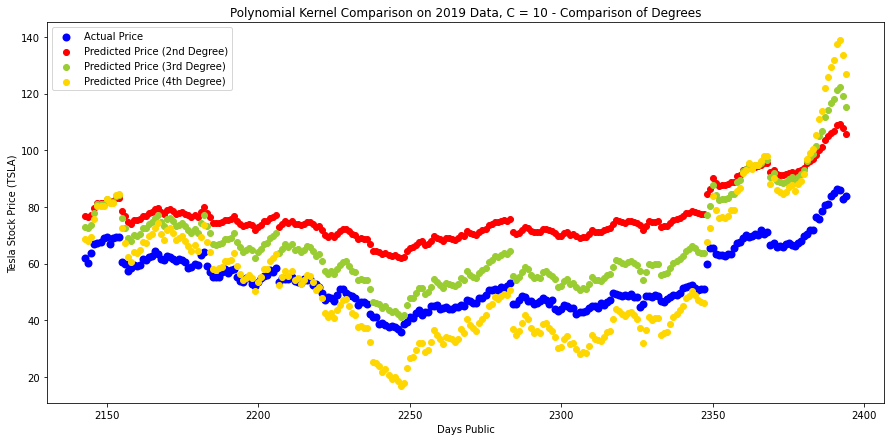

In [25]:
poly_train_accuracy_2 = []
poly_test_accuracy_2 = []
poly_accuracy_2019_2 = []
poly_train_accuracy_3 = []
poly_test_accuracy_3 = []
poly_accuracy_2019_3 = []
poly_train_accuracy_4 = []
poly_test_accuracy_4 = []
poly_accuracy_2019_4 = []

for c in cVals:
    svr_poly_2 = svm.SVR(kernel = 'poly', C = c, degree = 2) # I use degrees 2, 3, and 4
    svr_poly_3 = svm.SVR(kernel = 'poly', C = c, degree = 3) # I use degrees 2, 3, and 4
    svr_poly_4 = svm.SVR(kernel = 'poly', C = c, degree = 4) # I use degrees 2, 3, and 4
    
    svr_poly_2.fit(x_train, y_train)
    svr_poly_3.fit(x_train, y_train)
    svr_poly_4.fit(x_train, y_train)
    
    y_poly_train_2 = svr_poly_2.predict(x_train)
    svm_confidence_2 = svr_poly_2.score(x_train, y_train)
    poly_train_accuracy_2.append(svm_confidence_2)
    y_poly_train_3 = svr_poly_3.predict(x_train)
    svm_confidence_3 = svr_poly_3.score(x_train, y_train)
    poly_train_accuracy_3.append(svm_confidence_3)
    y_poly_train_4 = svr_poly_4.predict(x_train)
    svm_confidence_4 = svr_poly_4.score(x_train, y_train)
    poly_train_accuracy_4.append(svm_confidence_4)
    
    y_poly_test_2 = svr_poly_2.predict(x_test)
    poly_acc_2 = svr_poly_2.score(x_test, y_test)
    poly_test_accuracy_2.append(poly_acc_2)
    y_poly_test_3 = svr_poly_3.predict(x_test)
    poly_acc_3 = svr_poly_3.score(x_test, y_test)
    poly_test_accuracy_3.append(poly_acc_3)
    y_poly_test_4 = svr_poly_4.predict(x_test)
    poly_acc_4 = svr_poly_4.score(x_test, y_test)
    poly_test_accuracy_4.append(poly_acc_4)
    
    y_hat_2019_poly_2 = svr_poly_2.predict(x_2019)
    poly_acc_2019_2 = svr_poly_2.score(x_2019, y_2019)
    poly_accuracy_2019_2.append(poly_acc_2019_2)
    y_hat_2019_poly_3 = svr_poly_3.predict(x_2019)
    poly_acc_2019_3 = svr_poly_3.score(x_2019, y_2019)
    poly_accuracy_2019_3.append(poly_acc_2019_3)
    y_hat_2019_poly_4 = svr_poly_4.predict(x_2019)
    poly_acc_2019_4 = svr_poly_4.score(x_2019, y_2019)
    poly_accuracy_2019_4.append(poly_acc_2019_4)
    
    plt.figure(figsize=(15,7))
    plt.title("Polynomial Kernel Comparison on Training Data, C = " + str(c))
    plt.ylabel("Tesla Stock Price (TSLA)")
    plt.xlabel("Days Public")
    plt.scatter(x_train[:, 0], y_train, c = 'b', linewidth = 2)
    plt.scatter(x_train[:, 0], y_poly_train_2, c = 'r', linewidth = 1)
    plt.scatter(x_train[:, 0], y_poly_train_3, c = 'yellowgreen', linewidth = 1)
    plt.scatter(x_train[:, 0], y_poly_train_4, c = 'gold', linewidth = 1)
    plt.legend(["Actual Price", "Predicted Price (2nd Degree)", "Predicted Price (3rd Degree)", "Predicted Price (4th Degree)"])
    plt.show()
    
    plt.figure(figsize=(15,7))
    plt.title("Polynomial Kernel Comparison on Testing Data, C = " + str(c))
    plt.ylabel("Tesla Stock Price (TSLA)")
    plt.xlabel("Days Public")
    plt.scatter(x_test[:, 0], y_test, c = 'b', linewidth = 2)
    plt.scatter(x_test[:, 0], y_poly_test_2, c = 'r', linewidth = 1)
    plt.scatter(x_test[:, 0], y_poly_test_3, c = 'yellowgreen', linewidth = 1)
    plt.scatter(x_test[:, 0], y_poly_test_4, c = 'gold', linewidth = 1)
    plt.legend(["Actual Price", "Predicted Price (2nd Degree)", "Predicted Price (3rd Degree)", "Predicted Price (4th Degree)"])
    plt.show()
    
    plt.figure(figsize=(15,7))
    plt.title("Polynomial Kernel Comparison on 2019 Data, C = " + str(c) + " - Comparison of Degrees")
    plt.ylabel("Tesla Stock Price (TSLA)")
    plt.xlabel("Days Public")
    plt.scatter(x_2019[:, 0], y_2019, c = 'b', linewidth = 2)
    plt.scatter(x_2019[:, 0], y_hat_2019_poly_2, c = 'r', linewidth = 1)
    plt.scatter(x_2019[:, 0], y_hat_2019_poly_3, c = 'yellowgreen', linewidth = 1)
    plt.scatter(x_2019[:, 0], y_hat_2019_poly_4, c = 'gold', linewidth = 1)
    plt.legend(["Actual Price", "Predicted Price (2nd Degree)", "Predicted Price (3rd Degree)", "Predicted Price (4th Degree)"])
    plt.show()
    

In [32]:
print(cVals)
print(poly_train_accuracy_3)
print(poly_test_accuracy_3)
print(poly_accuracy_2019_3)

[0.0001, 0.001, 0.01, 0.1, 1, 10]
[-0.029799226760865327, 0.20909066862405246, 0.6267493698535532, 0.6728537044190133, 0.6980508866209474, 0.7629036009162053]
[-0.10572185960417269, 0.13005718222526663, 0.6041397386521492, 0.6938494676040421, 0.7175183482423764, 0.7500377414374829]
[-1.3064847932831332, 0.02713356271823364, -7.416457455974379, -17.120780732052037, -13.32414090148519, -0.8740634261201268]


Text(0, 0.5, 'Accuracy')

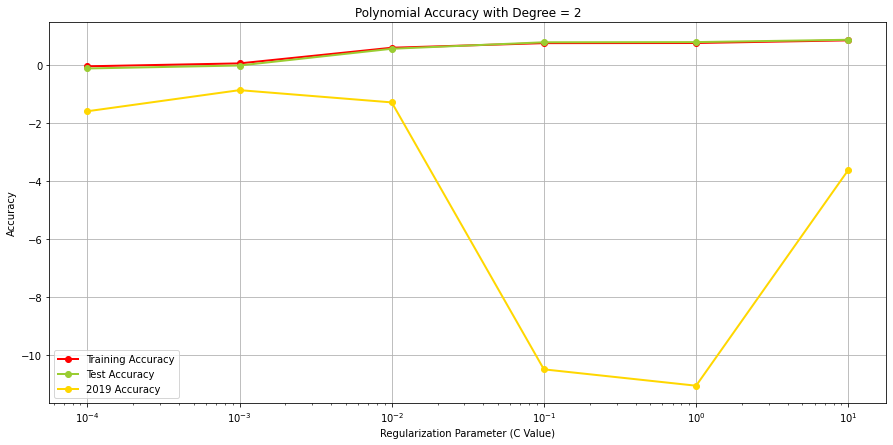

In [27]:
plt.figure(figsize=(15,7))
plt.plot(cVals, poly_train_accuracy_2, 'go-', c = 'r', linewidth = 2)
plt.plot(cVals, poly_test_accuracy_2, 'go-', c = 'yellowgreen', linewidth = 2)
plt.plot(cVals, poly_accuracy_2019_2, 'or-', c = 'gold', linewidth = 2)
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy', '2019 Accuracy'], loc='lower left')
plt.xlabel('Regularization Parameter (C Value)')
plt.xscale("Log")
plt.title("Polynomial Accuracy with Degree = 2") # I change the value of the degree, and it is used to be plotted
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

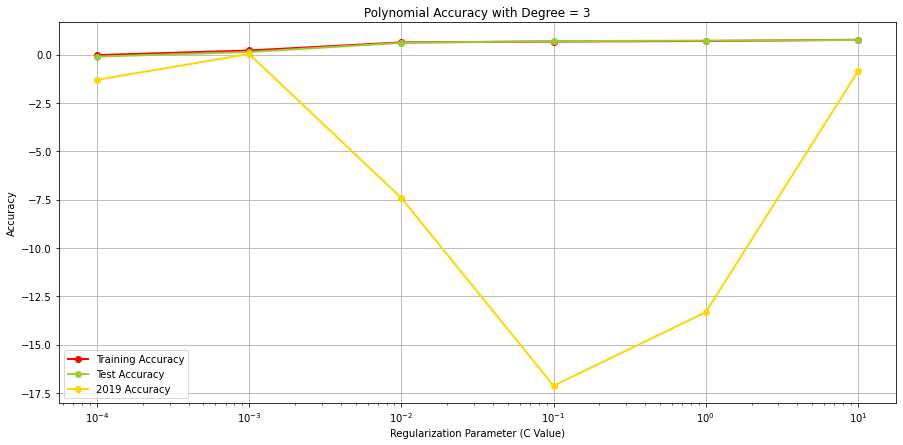

In [29]:
plt.figure(figsize=(15,7))
plt.plot(cVals, poly_train_accuracy_3, 'go-', c = 'r', linewidth = 2)
plt.plot(cVals, poly_test_accuracy_3, 'go-', c = 'yellowgreen', linewidth = 2)
plt.plot(cVals, poly_accuracy_2019_3, 'or-', c = 'gold', linewidth = 2)
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy', '2019 Accuracy'], loc='lower left')
plt.xlabel('Regularization Parameter (C Value)')
plt.xscale("Log")
plt.title("Polynomial Accuracy with Degree = 3") # I change the value of the degree, and it is used to be plotted
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

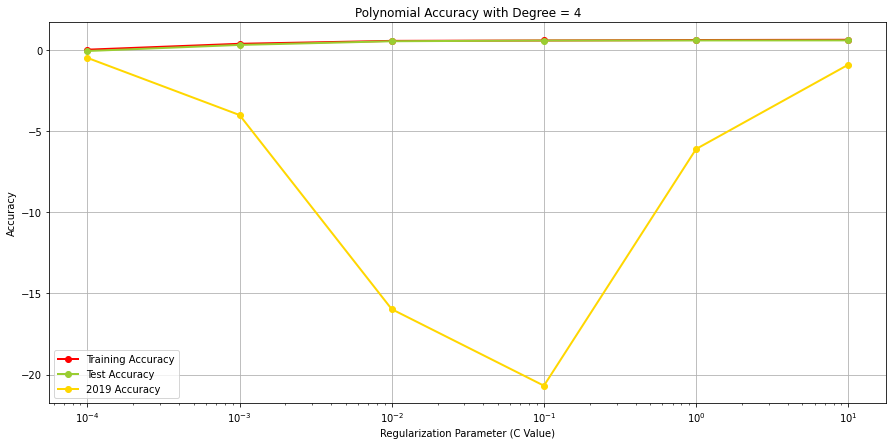

In [31]:
plt.figure(figsize=(15,7))
plt.plot(cVals, poly_train_accuracy_4, 'go-', c = 'r', linewidth = 2)
plt.plot(cVals, poly_test_accuracy_4, 'go-', c = 'yellowgreen', linewidth = 2)
plt.plot(cVals, poly_accuracy_2019_4, 'or-', c = 'gold', linewidth = 2)
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy', '2019 Accuracy'], loc='lower left')
plt.xlabel('Regularization Parameter (C Value)')
plt.xscale("Log")
plt.title("Polynomial Accuracy with Degree = 4") # I change the value of the degree, and it is used to be plotted
plt.ylabel('Accuracy')